<div>
    <img src="imagens/logo_if_eng_comp.png" alt="Logotipo do projeto" width="400"/>
</div><br>
<div style= "text-align:center;">
    <img src="imagens/brasao_Brasil.png" alt="Logotipo do projeto" width="200"/>
</div>
<div style= "text-align:center;"><b>MINIST√âRIO DA EDUCA√á√ÉO</b><br>
<b>Instituto Federal de Educa√ß√£o, Ci√™ncia e Tecnologia do Sul de Minas</b><br>  
<b>IFSULDEMINAS - Campus Po√ßos de Caldas</b><br> 
Avenida Dirce Pereira Rosa, 300. Po√ßos de Caldas/MG. CEP 37713-100  
Fone: (35) 3713-5120 
</div>
<h1 align="center" style="font-family: 'Times New Roman', Times, serif; font-weight: bold;">
  Intelig√™ncia Artificial - Trabalho Pr√°tico 3
</h1>
<h1 align="center" style="font-family: 'Times New Roman', Times, serif; font-weight: bold;">
  Pr√©-Processamento, An√°lise e Predi√ß√£o de Dados
</h1>
<h2 align="center" style="font-family: 'Times New Roman', Times, serif; font-weight: bold;">
  Prof. Douglas Castilho
</h2>
<br>
<h4 style="text-align: right;">Aluno: Daniel Pe√ßanha Pereira</h4>
<h4 style="text-align: right;">Base de Dados: Chess (King-Rook vs. King-Pawn) - UC Irvine Machine Learning Repository</h4>
<br>

<p style="font-weight: bold;">
  Import das bibliotecas usadas:
</p>

In [2]:
from IPython.display import HTML, display
from IPython.display import FileLink
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

<p style="font-weight: bold;">
  Informa√ß√µes sobre a base de dados:
</p>

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# Carrega o rep
chess_king_rook_vs_king_pawn = fetch_ucirepo(id=22) 

# metadata
meta = chess_king_rook_vs_king_pawn.metadata

print("-------METADADOS-------\n")

for chave, valor in meta.items():
    if chave != "additional_info":
        print(f"{chave}: {valor}")

print()

print("-------INFORMA√á√ïES DAS VARI√ÅVEIS-------\n")
# variable information 
print(chess_king_rook_vs_king_pawn.variables) 

-------METADADOS-------

uci_id: 22
name: Chess (King-Rook vs. King-Pawn)
repository_url: https://archive.ics.uci.edu/dataset/22/chess+king+rook+vs+king+pawn
data_url: https://archive.ics.uci.edu/static/public/22/data.csv
abstract: King+Rook versus King+Pawn on a7 (usually abbreviated KRKPA7).
area: Games
tasks: ['Classification']
characteristics: ['Multivariate']
num_instances: 3196
num_features: 35
feature_types: ['Categorical']
demographics: []
target_col: ['wtoeg']
index_col: None
has_missing_values: no
missing_values_symbol: None
year_of_dataset_creation: 1983
last_updated: Fri Mar 08 2024
dataset_doi: 10.24432/C5DK5C
creators: ['Alen Shapiro']
intro_paper: None

-------INFORMA√á√ïES DAS VARI√ÅVEIS-------

     name     role         type demographic description units missing_values
0   bkblk  Feature  Categorical        None        None  None             no
1   bknwy  Feature  Categorical        None        None  None             no
2   bkon8  Feature  Categorical        None     

<div style= "text-align:center;">
    <img src="imagens/chess.features.png" alt="Logotipo do projeto"/>
</div>

<h4>1. Identifica√ß√£o do atributo alvo (sa√≠da):</h4> 

In [3]:
X = chess_king_rook_vs_king_pawn.data.features 
y = chess_king_rook_vs_king_pawn.data.targets 
  
col_name = y.columns[0]

html = f"<span style='font-size:16px; ;'>R: A vari√°vel target √©: '{col_name}', podendo ser won ou nowin, indicando se as brancas vencem a partida ou n√£o.</span>"

display(HTML(html))

<h5>
  Baixando a base de dados para um arquivo csv:
</h5>

In [4]:
df = chess_king_rook_vs_king_pawn.data.original

# Salva o CSV localmente
df.to_csv('KRKPA7.csv', index=False, encoding='utf-8')

# Gera um link de download
FileLink('KRKPA7.csv')

/home/daniel/Ambientes_De_Trabalho/notebooks_xadrez/KRKPA7.csv

In [5]:
df = pd.read_csv('KRKPA7.csv')

<h4>
  2. Identifica√ß√£o dos tipos de dados dos atributos de entrada (quantitativo, qualitativo):
</h4>

In [6]:
pd.set_option('display.max_columns', None)
df

bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq cntxt dsopp  \
0        f     f     f     f     f     f     f     f     f     f     f     l   
1        f     f     f     t     f     f     f     f     f     f     f     l   
2        f     f     f     t     f     t     f     f     f     f     f     l   
3        f     f     f     f     f     f     f     t     f     f     f     l   
4        f     f     f     f     f     f     f     f     f     f     f     l   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3191     f     f     f     f     f     t     f     f     f     f     t     l   
3192     f     f     f     f     f     t     f     f     f     f     t     l   
3193     f     f     f     f     f     t     f     f     f     f     t     l   
3194     f     t     f     f     f     t     f     f     f     f     t     l   
3195     f     t     f     f     f     t     f     f     f     f     t     l   

     dwipd hdchk katri mulch qxmsq r2ar8 reskd reskr rimmx rkxwp rxmsq simpl  \
0        f     n     f     f     t     f     f     f     f     f     f     f   
1        f     n     f     f     t     f     f     f     f     f     f     f   
2        f     n     f     f     t     f     f     f     f     f     f     f   
3        f     n     f     f     t     f     f     f     t     f     f     f   
4        f     n     f     f     t     f     f     f     f     f     t     f   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3191     f     b     f     f     t     f     f     f     f     t     t     f   
3192     f     b     f     f     t     f     f     f     f     t     f     f   
3193     f     n     f     f     t     f     f     f     f     t     f     f   
3194     t     b     t     f     t     f     f     f     f     f     t     f   
3195     t     n     t     f     t     f     f     f     f     f     t     f   

     skach skewr skrxp spcop stlmt thrsk wkcti wkna8 wknck wkovl wkpos  wtoeg  
0        t     f     f     f     f     f     f     f     t     t     n    won  
1        t     f     f     f     f     f     f     f     t     t     n    won  
2        t     f     f     f     f     f     f     f     t     t     n    won  
3        t     f     f     f     f     f     f     f     t     t     n    won  
4        t     f     f     f     f     f     f     f     t     t     n    won  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  
3191     t     f     f     t     f     f     t     f     t     f     n  nowin  
3192     t     f     f     t     f     f     t     f     t     f     n  nowin  
3193     t     f     f     t     f     f     t     f     t     f     n  nowin  
3194     t     f     f     t     f     f     t     f     f     f     n  nowin  
3195     t     f     f     t     f     f     t     f     f     f     n  nowin  

[3196 rows x 36 columns]

In [7]:
for coluna in df.columns:
    # Dicion√°rio para contagens
    classes = set()
    for valor in df[coluna]:
        # Incrementa a contagem do valor
        if valor not in classes:
            classes.add(valor)

    print(f"Classes na coluna {coluna}: " + ", ".join(f"{c} ({type(c).__name__})" for c in classes))


Classes na coluna bkblk: f (str), t (str)
Classes na coluna bknwy: f (str), t (str)
Classes na coluna bkon8: f (str), t (str)
Classes na coluna bkona: f (str), t (str)
Classes na coluna bkspr: f (str), t (str)
Classes na coluna bkxbq: f (str), t (str)
Classes na coluna bkxcr: f (str), t (str)
Classes na coluna bkxwp: f (str), t (str)
Classes na coluna blxwp: f (str), t (str)
Classes na coluna bxqsq: f (str), t (str)
Classes na coluna cntxt: f (str), t (str)
Classes na coluna dsopp: g (str), l (str)
Classes na coluna dwipd: f (str), t (str)
Classes na coluna hdchk: w (str), n (str), b (str)
Classes na coluna katri: f (str), t (str)
Classes na coluna mulch: f (str), t (str)
Classes na coluna qxmsq: f (str), t (str)
Classes na coluna r2ar8: f (str), t (str)
Classes na coluna reskd: f (str), t (str)
Classes na coluna reskr: f (str), t (str)
Classes na coluna rimmx: f (str), t (str)
Classes na coluna rkxwp: f (str), t (str)
Classes na coluna rxmsq: f (str), t (str)
Classes na coluna simpl: 

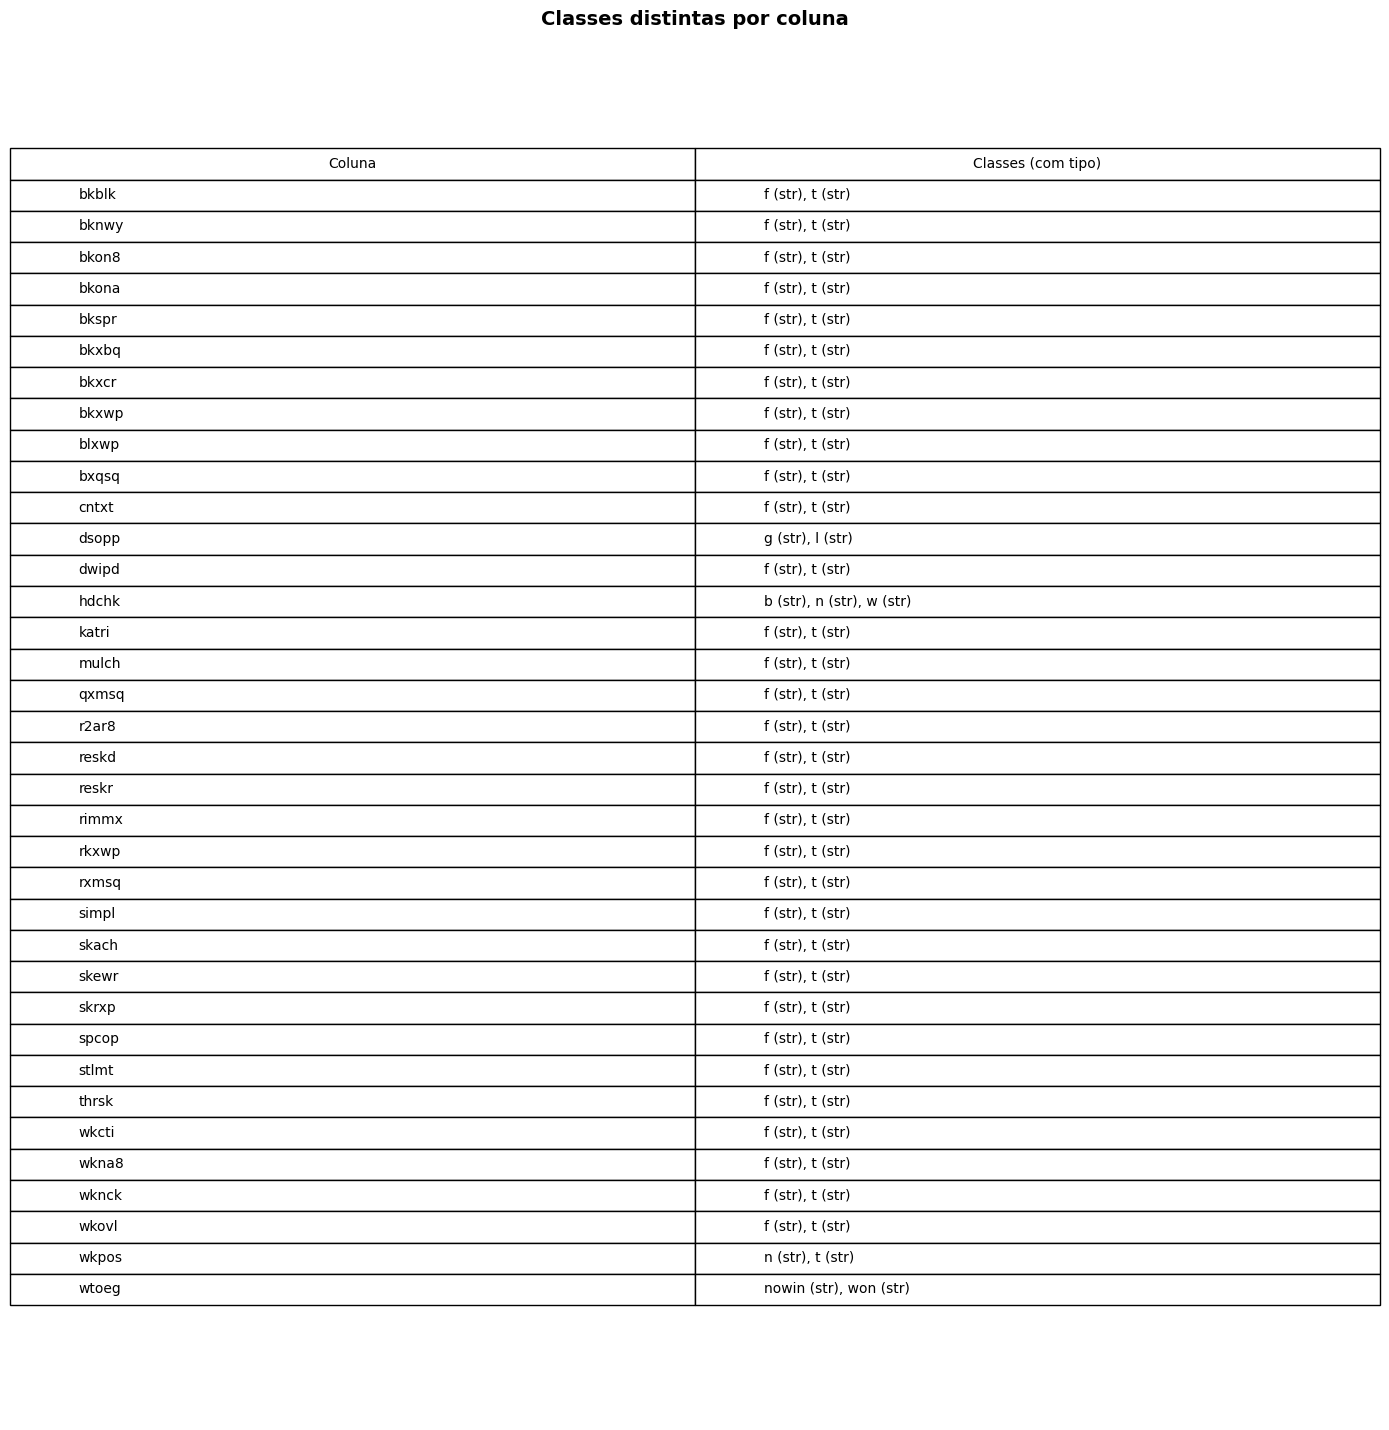

In [8]:
colunas = []
classes_texto = []

for coluna in df.columns:
    classes = set()
    for valor in df[coluna]:
        classes.add(f"{valor} ({type(valor).__name__})")

    colunas.append(coluna)
    classes_texto.append(", ".join(sorted(classes)))

# Criar DataFrame auxiliar
tabela = pd.DataFrame({
    "Coluna": colunas,
    "Classes (com tipo)": classes_texto
})

# Plotar tabela
fig, ax = plt.subplots(figsize=(14, len(tabela)*0.4))
ax.axis('tight')
ax.axis('off')
tabela_plotada = ax.table(cellText=tabela.values,
                          colLabels=tabela.columns,
                          loc='center',
                          cellLoc='left')

tabela_plotada.auto_set_font_size(False)
tabela_plotada.set_fontsize(10)
tabela_plotada.scale(1, 1.5)

plt.title("Classes distintas por coluna", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


<span style='font-size:16px; ;'>R: Os dados s√£o qualitativos/categ√≥ricos. Eles descrevem a posi√ß√£o das pe√ßas no tabuleiro e as caracter√≠sticas associadas aquela configura√ß√£o do tabuleiro, como por exemplo o atributo 'hdchk', que possui tr√™s poss√≠veis categorias, w, b ou n, indicando, consecutivamente, se na posi√ß√£o em que as pe√ßas est√£o h√° um cheque oculto para as brancas, para as pretas, ou para nenhum dos dois. Os outros atributos, em suma, s√£o taxados em true ou false, indicando se aquela caracter√≠stica que d√° nome ao atributo, √© verdadeira ou n√£o para aquela configura√ß√£o do tabuleiro daquela amostra.</span>

<h4>3. Identifica√ß√£o da escala de dados dos atributos de entrada (nominal, ordinal, intervalar,  racional):</h4>  

<span style='font-size:16px;'> R: A escala dos dados dos atributos de entrada s√£o todas nominais. A maioria possui duas categorias, verdadeiro ou falso; 'hdchk' possui tr√™s cateogrias, mas sem que haja uma rela√ß√£o de ordem entre elas. </span>

<h4> 4. Explora√ß√£o dos dados atrav√©s de medidas de localidade: </h4>


<span style='font-size:16px;'>Como os dados s√£o s√≠mbolicos, representando se determinada caracter√≠stica √© verdadeira ou n√£o, a √∫nica medida de localidade aplic√°vel √© moda.</span>

In [9]:
for coluna in df.columns:
    # Dicion√°rio para contagens
    contagens = {}
    for valor in df[coluna]:
        # Incrementa a contagem do valor
        if valor in contagens:
            contagens[valor] += 1
        else:
            contagens[valor] = 1
    
    # Identifica a moda (categoria mais frequente)
    moda = None
    freq_maxima = 0
    for categoria, freq in contagens.items():
        if freq > freq_maxima:
            freq_maxima = freq
            moda = categoria

    total = len(df[coluna])
    porcentagem_moda = (freq_maxima / total) * 100

    print(f"Coluna: {coluna}")
    print(f"Categorias e frequ√™ncias: {contagens}")
    print(f"Moda: {moda} (ocorre {freq_maxima} vezes, {porcentagem_moda:.2f}% do total)\n")

Coluna: bkblk
Categorias e frequ√™ncias: {'f': 2971, 't': 225}
Moda: f (ocorre 2971 vezes, 92.96% do total)

Coluna: bknwy
Categorias e frequ√™ncias: {'f': 3076, 't': 120}
Moda: f (ocorre 3076 vezes, 96.25% do total)

Coluna: bkon8
Categorias e frequ√™ncias: {'f': 2874, 't': 322}
Moda: f (ocorre 2874 vezes, 89.92% do total)

Coluna: bkona
Categorias e frequ√™ncias: {'f': 2129, 't': 1067}
Moda: f (ocorre 2129 vezes, 66.61% do total)

Coluna: bkspr
Categorias e frequ√™ncias: {'f': 1722, 't': 1474}
Moda: f (ocorre 1722 vezes, 53.88% do total)

Coluna: bkxbq
Categorias e frequ√™ncias: {'f': 2026, 't': 1170}
Moda: f (ocorre 2026 vezes, 63.39% do total)

Coluna: bkxcr
Categorias e frequ√™ncias: {'f': 2500, 't': 696}
Moda: f (ocorre 2500 vezes, 78.22% do total)

Coluna: bkxwp
Categorias e frequ√™ncias: {'f': 1980, 't': 1216}
Moda: f (ocorre 1980 vezes, 61.95% do total)

Coluna: blxwp
Categorias e frequ√™ncias: {'f': 2225, 't': 971}
Moda: f (ocorre 2225 vezes, 69.62% do total)

Coluna: bxqsq
C

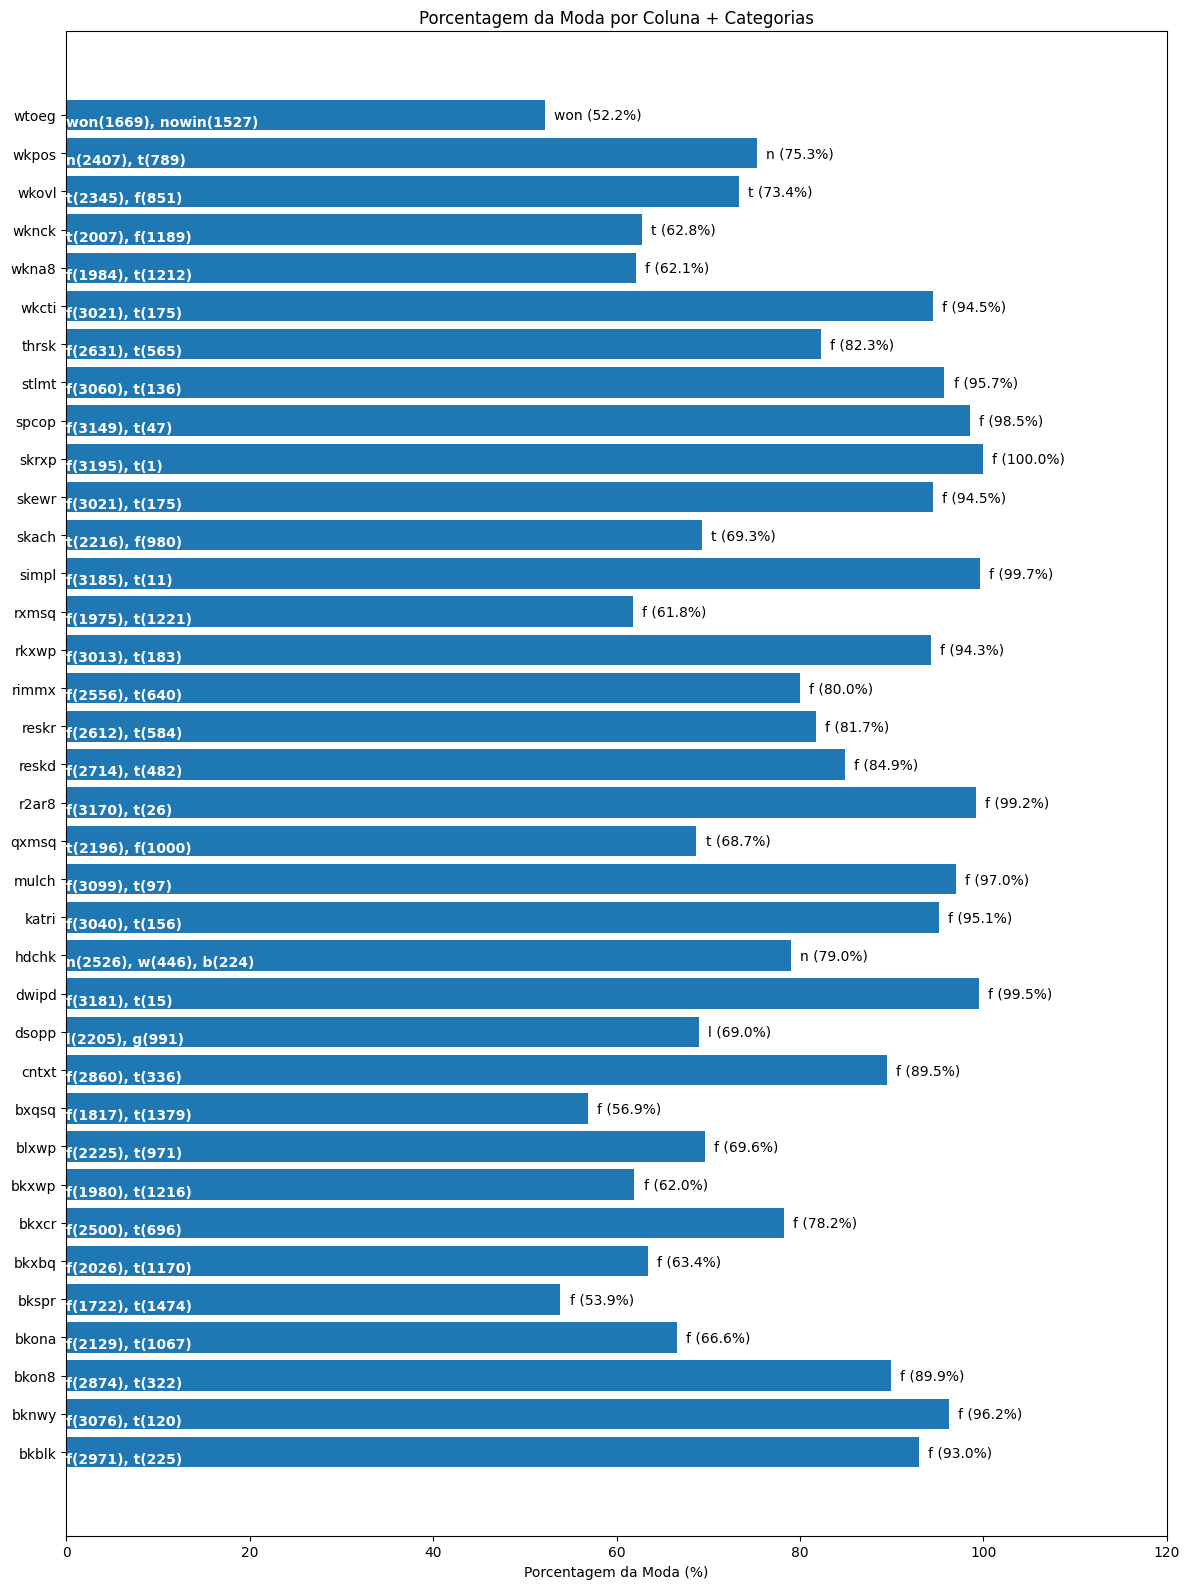

In [10]:
colunas = []
modas = []
porcentagens = []
categorias_por_coluna = []

for coluna in df.columns:
    contagens = {}
    for valor in df[coluna]:
        contagens[valor] = contagens.get(valor, 0) + 1

    # Moda e estat√≠sticas
    moda = max(contagens, key=contagens.get)
    freq_max = contagens[moda]
    porcentagem = (freq_max / len(df[coluna])) * 100

    colunas.append(coluna)
    modas.append(moda)
    porcentagens.append(porcentagem)
    categorias_por_coluna.append(", ".join(f"{k}({v})" for k, v in contagens.items()))

# Gr√°fico
plt.figure(figsize=(12, 16))
bars = plt.barh(colunas, porcentagens)

plt.xlabel("Porcentagem da Moda (%)")
plt.title("Porcentagem da Moda por Coluna + Categorias")

# Adiciona o texto da moda e porcentagem ao lado das barras
for i, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 1,              
        bar.get_y() + bar.get_height() / 2,
        f"{modas[i]} ({porcentagens[i]:.1f}%)",
        va='center'
    )

# Adiciona as categorias como legenda lateral
for i, txt in enumerate(categorias_por_coluna):
    plt.text(
        0,                         
        i,                         
        f"{txt}",
        fontsize=10,           
        fontweight='bold',     
        color="white",
        va='top'
    )

plt.xlim(0, 120)
plt.tight_layout()
plt.show()


<h4>5. Explora√ß√£o dos dados atrav√©s de medidas de espalhamento:</h4>

<h4>6. Explora√ß√£o dos dados atrav√©s de medidas de distribui√ß√£o:</h4>

<h4>7. Identifica√ß√£o e separa√ß√£o do conjunto de teste, que ser√° utilizado para testar o desempenho  dos modelos ‚Äì o conjunto de testes deve ser representativo e ter as caracter√≠sticas da  popula√ß√£o completa. Caso sua base de dados j√° tenha o conjunto de teste definido, analisar  se este segue as caracter√≠sticas do conjunto de treinamento:</h4>

In [11]:
import random

# Calcula quantas linhas representam 80% da base
total_linhas = len(df)
qtde_treino = int(0.8 * total_linhas)

indices_utilizados = set()
df_treino = pd.DataFrame(columns=df.columns)

# Loop para sele√ß√£o aleat√≥ria de 80% dos dados
for _ in range(qtde_treino):
    while True:
        indice_aleatorio = random.randint(0, total_linhas - 1)
        if indice_aleatorio not in indices_utilizados:
            indices_utilizados.add(indice_aleatorio)
            linha = df.iloc[indice_aleatorio]
            df_treino = pd.concat([df_treino, pd.DataFrame([linha])], ignore_index=True)
            break

#  Cria√ß√£o do dataframe de teste com os √≠ndices que sobraram
todos_indices = set(range(total_linhas))
indices_teste = list(todos_indices - indices_utilizados)
df_teste = df.iloc[indices_teste].reset_index(drop=True)

# Verifica√ß√µes
print(f"Total original: {total_linhas}")
print(f"Treino: {len(df_treino)} linhas")
print(f"Teste: {len(df_teste)} linhas")

# Salva o CSV localmente
df_treino.to_csv('KRKPA7_treino.csv', index=False, encoding='utf-8')
df_teste.to_csv('KRKPA7_teste.csv', index=False, encoding='utf-8')

Total original: 3196
Treino: 2556 linhas
Teste: 640 linhas


In [12]:
contagens = {}
for valor in df_treino['wtoeg']:
    if valor in contagens:
        contagens[valor] += 1
    else:
        contagens[valor] = 1
    
# Identifica a moda (categoria mais frequente)
moda = None
freq_maxima = 0
for categoria, freq in contagens.items():
    if freq > freq_maxima:
        freq_maxima = freq
        moda = categoria

total = len(df_treino['wtoeg'])
porcentagem_moda = (freq_maxima / total) * 100

print("Coluna: wtoeg")
print(f"Categorias e frequ√™ncias: {contagens}")
print(f"Moda: {moda} (ocorre {freq_maxima} vezes, {porcentagem_moda:.2f}% do total)\n")

Coluna: wtoeg
Categorias e frequ√™ncias: {'won': 1334, 'nowin': 1222}
Moda: won (ocorre 1334 vezes, 52.19% do total)



In [13]:
contagens = {}
for valor in df_teste['wtoeg']:
    if valor in contagens:
        contagens[valor] += 1
    else:
        contagens[valor] = 1
    
# Identifica a moda (categoria mais frequente)
moda = None
freq_maxima = 0
for categoria, freq in contagens.items():
    if freq > freq_maxima:
        freq_maxima = freq
        moda = categoria

total = len(df_teste['wtoeg'])
porcentagem_moda = (freq_maxima / total) * 100

print("Coluna: wtoeg")
print(f"Categorias e frequ√™ncias: {contagens}")
print(f"Moda: {moda} (ocorre {freq_maxima} vezes, {porcentagem_moda:.2f}% do total)\n")

Coluna: wtoeg
Categorias e frequ√™ncias: {'won': 335, 'nowin': 305}
Moda: won (ocorre 335 vezes, 52.34% do total)



In [14]:
df_treino = pd.read_csv('KRKPA7_treino.csv')
df_teste = pd.read_csv('KRKPA7_teste.csv')

<h4>8. Identifica√ß√£o e elimina√ß√£o de atributos n√£o necess√°rios:</h4>

<span style='font-size:16px;'>Todos os atributos dizem respeito √† uma caracter√≠stica da configura√ß√£o do tabuleiro na etapa final do jogo. O jogo em si s√≥ tem o rei preto, o rei branco, um pe√£o preto e uma torre branca. Nesse sentido, esses atributos dizem respeito √† posi√ß√£o dessas quatro pe√ßas no tabuleiro, da qual podem se extrair informa√ß√µes importantes, com xeques descobertos e outros dados, que s√£o cada uma das colunas. Dessa forma, todos os atributos tem a ver com o atributo-alvo que diz se as brancas v√£o ganhar ou n√£o, contudo, nem todas essas informa√ß√µes da posi√ß√£o das pe√ßas podem trazer de fato um peso na vit√≥ria das brancas. Isso ser√° analisado no item 14. </span>

<h4>9. Identifica√ß√£o e elimina√ß√£o de exemplos n√£o necess√°rios:</h4>
<span style='font-size:16px;'>Todos os exemplos s√£o configura√ß√µes leg√≠timas do tabuleiro, contudo, isso n√£o impede de haver duplicatas ou dados inconsistentes. Isso ser√° analisado no item 12.</span>

<h4>10. An√°lise e aplica√ß√£o de t√©cnicas de amostragem de dados (caso n√£o seja necess√°rio, analisar
o porqu√™):</h4>
<span style='font-size:16px;'>N√£o √© necess√°rio uma amostragem de dados porque o conjunto de treinamento possui 2556 inst√¢ncias, todas bin√°rias. Isso n√£o representa uma quantidade muito grande para a √°rea de dados nem exige muitos recursos computacionais.</span>

<h4>11. Identifica√ß√£o e aplica√ß√£o de t√©cnicas para minimizar problemas de desbalanceamento (caso
n√£o seja necess√°rio, analisar o porqu√™):</h4>
<span style='font-size:16px;'>N√£o s√£o necess√°rias t√©cnicas para minimizar problemas de desbalanceamento porque as duas classes da vari√°vel-alvo possuem uma difer√™n√ßa de 2% em apari√ß√µes, que pode ser considerado balanceado, 52% para 'win' e '48%' para 'notwin'.</span>

<h4>12. Limpeza de dados:</h4>
<h4>a. Identifica√ß√£o e elimina√ß√£o de ru√≠dos ou outliers:</h4><span style='font-size:16px;'> Como vimos no item 4, n√£o h√° nenhum valor estranho nas classes das features. Todas est√£o como o esperado e de acordo com a documenta√ß√£o da base de dados. Tamb√©m n√£o h√° valores faltantes.</span>

<h4>b. Identifica√ß√£o e elimina√ß√£o de dados inconsistentes:</h4>  

In [15]:
# Separar features e label
features_cols = df_treino.columns[:-1]  # todas menos a √∫ltima
label_col = df_treino.columns[-1]       # √∫ltima coluna √© o label

# Estrutura para armazenar as combina√ß√µes de features e seus labels
combinacoes = {}

# Verifica inconsist√™ncias
for index, row in df.iterrows():
    chave = tuple(row[features_cols])  # combina√ß√£o de features como tupla

    if chave in combinacoes:
        combinacoes[chave].add(row[label_col])
    else:
        combinacoes[chave] = {row[label_col]}

# Mostrar inconsist√™ncias
inconsistencias = {k: v for k, v in combinacoes.items() if len(v) > 1}

# Imprimir resultado
if inconsistencias:
    print("Inconsist√™ncias encontradas:")
    for k, v in inconsistencias.items():
        print(f"Features: {k} -> Labels diferentes: {v}")
else:
    print("Nenhuma inconsist√™ncia encontrada.")


Inconsist√™ncias encontradas:
Features: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 'f', 'n') -> Labels diferentes: {'won', 'nowin'}
Features: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 'f', 'n') -> Labels diferentes: {'won', 'nowin'}
Features: ('f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'b', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 'n') -> Labels diferentes: {'won', 'nowin'}
Features: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'g', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'n') -> Labels diferentes: {'won', 'nowin'}
Features: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'g',

In [16]:
features_cols = df_treino.columns[:-1]
label_col = df_treino.columns[-1]

# Dicion√°rio: chave = tuple(features), valor = lista de tuplas (index, label)
grupos = {}

for index, row in df_treino.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [(index, label)]
    else:
        grupos[chave].append((index, label))

# Verificar inconsist√™ncias e imprimir
grupo_id = 1
for chave, instancias in grupos.items():
    labels_encontrados = set(label for _, label in instancias)
    
    if len(labels_encontrados) > 1:
        print(f"\nüîç Chave de inst√¢ncias {grupo_id}:")
        for idx, lbl in instancias:
            print(f"{idx}: \"{lbl}\"")
        grupo_id += 1



üîç Chave de inst√¢ncias 1:
24: "nowin"
285: "won"

üîç Chave de inst√¢ncias 2:
53: "nowin"
1507: "won"

üîç Chave de inst√¢ncias 3:
299: "nowin"
1954: "won"

üîç Chave de inst√¢ncias 4:
325: "nowin"
874: "won"

üîç Chave de inst√¢ncias 5:
423: "nowin"
1187: "won"

üîç Chave de inst√¢ncias 6:
981: "won"
2406: "nowin"

üîç Chave de inst√¢ncias 7:
1544: "nowin"
2129: "won"


In [17]:
features_cols = df_treino.columns[:-1]
label_col = df_treino.columns[-1]

grupos = {}

for index, row in df_treino.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [(index, label)]
    else:
        grupos[chave].append((index, label))

# Identificar √≠ndices a serem removidos (duplas inconsistentes)
indices_para_remover = []

for instancias in grupos.values():
    if len(instancias) == 2:
        labels = {label for _, label in instancias}
        if len(labels) > 1:
            # inst√¢ncias com labels diferentes ‚Üí inconsistente
            indices_para_remover.extend([idx for idx, _ in instancias])

# Remover as inconsist√™ncias
df_treino = df_treino.drop(index=indices_para_remover).reset_index(drop=True)

print(f"{len(indices_para_remover)} linhas inconsistentes removidas.")

14 linhas inconsistentes removidas.


In [18]:
features_cols = df_teste.columns[:-1]
label_col = df_teste.columns[-1]

grupos = {}

for index, row in df_teste.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [(index, label)]
    else:
        grupos[chave].append((index, label))

# Verificar inconsist√™ncias e imprimir
grupo_id = 1
for chave, instancias in grupos.items():
    labels_encontrados = set(label for _, label in instancias)
    
    if len(labels_encontrados) > 1:
        print(f"\nüîç Chave de inst√¢ncias {grupo_id}:")
        for idx, lbl in instancias:
            print(f"{idx}: \"{lbl}\"")
        grupo_id += 1


üîç Chave de inst√¢ncias 1:
19: "won"
389: "nowin"

üîç Chave de inst√¢ncias 2:
151: "won"
430: "nowin"

üîç Chave de inst√¢ncias 3:
400: "nowin"
581: "won"


In [19]:
features_cols = df_teste.columns[:-1]
label_col = df_teste.columns[-1]

grupos = {}

for index, row in df_teste.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [(index, label)]
    else:
        grupos[chave].append((index, label))

# Identificar √≠ndices a serem removidos (duplas inconsistentes)
indices_para_remover = []

for instancias in grupos.values():
    if len(instancias) == 2:
        labels = {label for _, label in instancias}
        if len(labels) > 1:
            # inst√¢ncias com labels diferentes ‚Üí inconsistente
            indices_para_remover.extend([idx for idx, _ in instancias])

# Remover as inconsist√™ncias
df_teste = df_teste.drop(index=indices_para_remover).reset_index(drop=True)

print(f"{len(indices_para_remover)} linhas inconsistentes removidas.")

6 linhas inconsistentes removidas.


In [20]:
features_cols = df_treino.columns[:-1]
label_col = df_treino.columns[-1]

grupos = {}

# Agrupar as linhas de df_treino
for index, row in df_treino.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [("df_treino", index, label)]
    else:
        grupos[chave].append(("df_treino", index, label))

# Agrupar as linhas de df_teste
for index, row in df_teste.iterrows():
    chave = tuple(row[features_cols])
    label = row[label_col]
    
    if chave not in grupos:
        grupos[chave] = [("df_teste", index, label)]
    else:
        grupos[chave].append(("df_teste", index, label))

# Verificar inconsist√™ncias e imprime
grupo_id = 1
for chave, instancias in grupos.items():
    # S√≥ nos interessam casos com dados de ambos os dataframes
    origens = {origem for origem, _, _ in instancias}
    labels = {label for _, _, label in instancias}
    
    if len(origens) > 1 and len(labels) > 1:
        print(f"\nüîç Chave de inst√¢ncias {grupo_id}:")
        for origem, idx, lbl in instancias:
            print(f"{origem} - √≠ndice {idx}: \"{lbl}\"")
        grupo_id += 1



üîç Chave de inst√¢ncias 1:
df_treino - √≠ndice 580: "nowin"
df_teste - √≠ndice 149: "won"

üîç Chave de inst√¢ncias 2:
df_treino - √≠ndice 803: "nowin"
df_teste - √≠ndice 553: "won"

üîç Chave de inst√¢ncias 3:
df_treino - √≠ndice 1148: "won"
df_teste - √≠ndice 372: "nowin"

üîç Chave de inst√¢ncias 4:
df_treino - √≠ndice 1502: "won"
df_teste - √≠ndice 381: "nowin"

üîç Chave de inst√¢ncias 5:
df_treino - √≠ndice 1976: "won"
df_teste - √≠ndice 422: "nowin"


In [21]:
# Coletar as chaves inconsistentes
chaves_inconsistentes = set()

for chave, instancias in grupos.items():
    origens = {origem for origem, _, _ in instancias}
    labels = {label for _, _, label in instancias}
    
    if len(origens) > 1 and len(labels) > 1:
        chaves_inconsistentes.add(chave)

# Fun√ß√£o para marcar linhas a serem removidas
def indices_para_remover(df, chaves_inconsistentes):
    indices = []
    for idx, row in df.iterrows():
        chave = tuple(row[features_cols])
        if chave in chaves_inconsistentes:
            indices.append(idx)
    return indices

# Obter os √≠ndices a remover em cada dataframe
indices_df_treino = indices_para_remover(df_treino, chaves_inconsistentes)
indices_df_teste = indices_para_remover(df_teste, chaves_inconsistentes)

# Remover as linhas
df_treino = df_treino.drop(index=indices_df_treino).reset_index(drop=True)
df_teste = df_teste.drop(index=indices_df_teste).reset_index(drop=True)

print(f"Removidas {len(indices_df_treino)} linhas de df_treino e {len(indices_df_teste)} de df_teste por inconsist√™ncia.")


Removidas 5 linhas de df_treino e 5 de df_teste por inconsist√™ncia.


<h4>c. Identifica√ß√£o e elimina√ß√£o de dados reduntadantes:</h4>

In [22]:
instancias = {}

for index, row in df_treino.iterrows():
    chave = tuple(row)
    
    if chave not in instancias:
        instancias[chave] = [index]
    else:
        instancias[chave].append(index)

# Mostrar apenas as chaves com duplicatas
grupo_id = 1
for chave, indices in instancias.items():
    if len(indices) > 1:
        print(f"\nüîÅ Inst√¢ncia duplicada {grupo_id}:")
        print(f"Valores: {chave}")
        print("√çndices:", indices)
        grupo_id += 1



üîÅ Inst√¢ncia duplicada 1:
Valores: ('f', 'f', 'f', 'f', 't', 'f', 't', 't', 't', 't', 'f', 'l', 'f', 'b', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 'n', 'nowin')
√çndices: [25, 631]

üîÅ Inst√¢ncia duplicada 2:
Valores: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'f', 'b', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'n', 'nowin')
√çndices: [28, 1520]

üîÅ Inst√¢ncia duplicada 3:
Valores: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 't', 'f', 't', 'f', 't', 'f', 'n', 'nowin')
√çndices: [73, 966]

üîÅ Inst√¢ncia duplicada 4:
Valores: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'w', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 't', 'n', 'won')
√çndices: [92, 1178]

üîÅ Inst√¢ncia duplica

In [23]:
instancias = {}

for index, row in df_treino.iterrows():
    chave = tuple(row)
    
    if chave not in instancias:
        instancias[chave] = [index]
    else:
        instancias[chave].append(index)

# Coletar os √≠ndices que devem ser removidos (duplicatas al√©m da primeira)
indices_para_remover = []

for indices in instancias.values():
    if len(indices) > 1:
        # Mant√©m o primeiro, remove os demais
        indices_para_remover.extend(indices[1:])

# Remove as duplicatas
df_treino = df_treino.drop(index=indices_para_remover).reset_index(drop=True)

print(f"{len(indices_para_remover)} duplicatas removidas manualmente do df_treino.")


38 duplicatas removidas manualmente do df_treino.


In [24]:
instancias = {}

for index, row in df_teste.iterrows():
    chave = tuple(row)
    
    if chave not in instancias:
        instancias[chave] = [index]
    else:
        instancias[chave].append(index)

# Mostrar apenas as chaves com duplicatas
grupo_id = 1
for chave, indices in instancias.items():
    if len(indices) > 1:
        print(f"\nüîÅ Inst√¢ncia duplicada {grupo_id}:")
        print(f"Valores: {chave}")
        print("√çndices:", indices)
        grupo_id += 1



üîÅ Inst√¢ncia duplicada 1:
Valores: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'n', 'nowin')
√çndices: [289, 417]


In [25]:
instancias = {}

for index, row in df_teste.iterrows():
    chave = tuple(row)
    
    if chave not in instancias:
        instancias[chave] = [index]
    else:
        instancias[chave].append(index)

# Coletar os √≠ndices que devem ser removidos (duplicatas al√©m da primeira)
indices_para_remover = []

for indices in instancias.values():
    if len(indices) > 1:
        # Mant√©m o primeiro, remove os demais
        indices_para_remover.extend(indices[1:])

# Remove as duplicatas
df_teste = df_teste.drop(index=indices_para_remover).reset_index(drop=True)

print(f"{len(indices_para_remover)} duplicatas removidas manualmente do df_teste.")


1 duplicatas removidas manualmente do df_teste.


In [26]:
# Criar conjuntos de tuplas com todas as colunas (linha completa) para cada dataframe
linhas_treino = {}
for idx, row in df_treino.iterrows():
    chave = tuple(row)
    if chave not in linhas_treino:
        linhas_treino[chave] = [idx]
    else:
        linhas_treino[chave].append(idx)

linhas_teste = {}
for idx, row in df_teste.iterrows():
    chave = tuple(row)
    if chave not in linhas_teste:
        linhas_teste[chave] = [idx]
    else:
        linhas_teste[chave].append(idx)

# Verificar interse√ß√£o entre os dois conjuntos de chaves
chaves_duplicadas = set(linhas_treino.keys()) & set(linhas_teste.keys())

# Exibir resultados
if chaves_duplicadas:
    print(f"\nüîÅ Encontradas {len(chaves_duplicadas)} inst√¢ncias duplicadas entre treino e teste:\n")
    for i, chave in enumerate(chaves_duplicadas, start=1):
        print(f"Duplicata {i}:")
        print(f"  Valores: {chave}")
        print(f"  √çndices no treino: {linhas_treino[chave]}")
        print(f"  √çndices no teste : {linhas_teste[chave]}")
        print()
else:
    print("‚úÖ Nenhuma duplicata encontrada entre df_treino e df_teste.")



üîÅ Encontradas 9 inst√¢ncias duplicadas entre treino e teste:

Duplicata 1:
  Valores: ('f', 'f', 'f', 'f', 't', 't', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'w', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 'n', 'won')
  √çndices no treino: [1008]
  √çndices no teste : [73]

Duplicata 2:
  Valores: ('f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'w', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 'f', 'n', 'won')
  √çndices no treino: [1192]
  √çndices no teste : [16]

Duplicata 3:
  Valores: ('f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'l', 'f', 'n', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 't', 'n', 'won')
  √çndices no treino: [224]
  √çndices no teste : [61]

Duplicata 4:
  Valores: ('f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'l', 'f', 'b', 'f', 'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f'

In [27]:
# Cria conjunto de tuplas com todas as colunas do df_treino
linhas_treino = set(tuple(row) for _, row in df_treino.iterrows())

# Identifica √≠ndices de df_teste que est√£o duplicados no df_treino
indices_para_remover = []
for idx, row in df_teste.iterrows():
    if tuple(row) in linhas_treino:
        indices_para_remover.append(idx)

# Remove essas linhas do df_teste
df_teste = df_teste.drop(index=indices_para_remover).reset_index(drop=True)

print(f"{len(indices_para_remover)} linhas removidas do df_teste por serem duplicadas com o df_treino.")


9 linhas removidas do df_teste por serem duplicadas com o df_treino.


In [28]:
def analisar_coluna_alvo(df, nome_df, coluna_alvo):
    print(f"\nüìä An√°lise da coluna-alvo '{coluna_alvo}' em {nome_df}:")

    # Frequ√™ncias das categorias
    freq = df[coluna_alvo].value_counts()
    total = freq.sum()
    categorias = freq.to_dict()

    # Moda (valor mais frequente)
    moda = freq.idxmax()
    freq_moda = freq.max()
    perc_moda = (freq_moda / total) * 100

    # Impress√£o
    print(f"Categorias e frequ√™ncias: {categorias}")
    print(f"Moda: {moda} (ocorre {freq_moda} vezes, {perc_moda:.2f}% do total)")

# Aplicar para df_treino e df_teste
analisar_coluna_alvo(df_treino, "df_treino", "wtoeg")
analisar_coluna_alvo(df_teste, "df_teste", "wtoeg")



üìä An√°lise da coluna-alvo 'wtoeg' em df_treino:
Categorias e frequ√™ncias: {'won': 1294, 'nowin': 1205}
Moda: won (ocorre 1294 vezes, 51.78% do total)

üìä An√°lise da coluna-alvo 'wtoeg' em df_teste:
Categorias e frequ√™ncias: {'won': 324, 'nowin': 295}
Moda: won (ocorre 324 vezes, 52.34% do total)


<h4>d. Identifica√ß√£o e resolu√ß√£o de dados incompletos (ausentes) - utiliza√ß√£o de alguma t√©cnica de preenchimento e justificar:</h4>

<h4>13. Identifica√ß√£o e convers√£o dos tipos de dados (caso n√£o seja necess√°rio, analisar o porqu√™).</h4>

<span>Por ser uma base de dados com colunas de atributos categ√≥ricos e bin√°rios (sim ou n√£o na maioria), podemos converter a base de dados para um formato de 1s ou 0s, o que √© pr√°tica costumeira na ci√™ncia de dados, pois valores num√©ricos facilitam todas as medidas, c√°lculos e algoritmos por ser a linguuagem comum do computador. Somente a coluna hdchk que possui tr√™s categorias, w (cheque oculto das brancas), b (cheque oculto das pretas e n (nenhum cheque oculto). Essa coluna ser√° convertida em outras duas colunas, hdchk_w que receber√° 1 quando hdchk for w e hdchk_b que receber√° 1 quando hdchk for b. A categoria n seria representada por hdchk_w e hdchk_b ambas em 0.  </span>

In [29]:
# codificar t/f para 1/0
map_bin = {'f': 0, 't': 1}
df_treino_encoded = df_treino.copy()
for col in df_treino.columns[:-1]:
    if col not in ['wkpos', 'hdchk', 'dsopp']:
        df_treino_encoded[col] = df_treino[col].replace(map_bin)

# codificar wkpos (t/n)
df_treino_encoded['wkpos'] = df_treino['wkpos'].replace({'t':1, 'n':0})
# codificar dsopp (t/n)
df_treino_encoded['dsopp'] = df_treino['dsopp'].replace({'l': 0, 'g': 1})

# codificar hdchk (w, b, n)
df_treino_encoded['hdchk_w'] = (df_treino['hdchk'] == 'w').astype(int)
df_treino_encoded['hdchk_b'] = (df_treino['hdchk'] == 'b').astype(int)

# remover a coluna hdchk original
df_treino_encoded = df_treino_encoded.drop(columns=['hdchk'])

# codificar target
df_treino_encoded['wtoeg'] = df_treino['wtoeg'].map({'won':1, 'nowin':0})

# mover wtoeg para √∫ltima coluna
cols = [col for col in df_treino_encoded.columns if col != 'wtoeg'] + ['wtoeg']
df_treino_encoded = df_treino_encoded[cols]

# salvar
df_treino_encoded.to_csv("KRKPA7_treino_numerico.csv", index=False)

/tmp/ipykernel_5260/694751381.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_treino_encoded[col] = df_treino[col].replace(map_bin)
/tmp/ipykernel_5260/694751381.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_treino_encoded['wkpos'] = df_treino['wkpos'].replace({'t':1, 'n':0})
/tmp/ipykernel_5260/694751381.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futur

In [30]:
df_treino = pd.read_csv('KRKPA7_treino_numerico.csv')

In [31]:
df_treino

bkblk  bknwy  bkon8  bkona  bkspr  bkxbq  bkxcr  bkxwp  blxwp  bxqsq  \
0         0      0      1      0      1      1      1      1      0      1   
1         0      0      1      1      1      0      0      1      0      0   
2         0      0      0      0      0      0      0      1      0      0   
3         0      0      0      1      0      0      0      0      1      0   
4         0      0      0      0      1      1      0      0      1      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2494      0      0      0      0      1      0      1      1      1      1   
2495      1      0      0      1      0      0      0      1      0      1   
2496      0      1      0      0      0      1      1      1      1      1   
2497      0      0      0      0      0      0      0      0      1      1   
2498      0      0      0      0      0      0      0      0      1      1   

      cntxt  dsopp  dwipd  katri  mulch  qxmsq  r2ar8  reskd  reskr  rimmx  \
0         0      0      0      0      0      1      0      1      0      1   
1         0      1      0      0      0      1      0      0      0      1   
2         1      0      0      0      0      1      0      0      0      1   
3         0      0      0      0      0      0      0      0      1      0   
4         0      0      0      0      0      1      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2494      0      1      0      0      0      1      0      0      0      0   
2495      0      0      0      0      0      0      0      1      1      1   
2496      0      0      0      0      0      0      0      1      1      0   
2497      0      0      0      0      0      1      0      0      0      0   
2498      1      1      0      0      0      1      0      0      0      0   

      rkxwp  rxmsq  simpl  skach  skewr  skrxp  spcop  stlmt  thrsk  wkcti  \
0         0      0      0      1      0      0      0      0      0      0   
1         0      0      0      1      0      0      0      0      0      0   
2         0      0      0      1      0      0      0      0      0      0   
3         0      1      0      0      0      0      0      0      0      0   
4         0      0      0      1      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2494      0      0      0      1      0      0      0      0      0      0   
2495      0      1      0      1      1      0      0      1      1      0   
2496      0      1      0      1      1      0      0      0      1      0   
2497      0      0      0      1      0      0      0      0      0      0   
2498      1      0      0      1      0      0      0      0      0      0   

      wkna8  wknck  wkovl  wkpos  hdchk_w  hdchk_b  wtoeg  
0         0      1      1      0        0        0      1  
1         0      1      1      0        0        0      1  
2         0      1      1      0        0        0      1  
3         0      0      1      1        0        0      1  
4         1      1      1      0        0        0      0  
...     ...    ...    ...    ...      ...      ...    ...  
2494      0      1      1      0        0        0      0  
2495      1      0      0      0        0        0      1  
2496      1      0      1      0        0        0      1  
2497      1      1      0      0        0        0      0  
2498      1      1      0      0        0        0      0  

[2499 rows x 37 columns]

In [32]:
# codificar t/f para 1/0
map_bin = {'f': 0, 't': 1}
df_teste_encoded = df_teste.copy()
for col in df_teste.columns[:-1]:
    if col not in ['wkpos', 'hdchk', 'dsopp']:
        df_teste_encoded[col] = df_teste[col].replace(map_bin)

# codificar wkpos (t/n)
df_teste_encoded['wkpos'] = df_teste['wkpos'].replace({'t':1, 'n':0})
# codificar dsopp (t/n)
df_teste_encoded['dsopp'] = df_teste['dsopp'].replace({'l': 0, 'g': 1})

# codificar hdchk (w, b, n)
df_teste_encoded['hdchk_w'] = (df_teste['hdchk'] == 'w').astype(int)
df_teste_encoded['hdchk_b'] = (df_teste['hdchk'] == 'b').astype(int)

# remover a coluna hdchk original
df_teste_encoded = df_teste_encoded.drop(columns=['hdchk'])

# codificar target
df_teste_encoded['wtoeg'] = df_teste['wtoeg'].map({'won':1, 'nowin':0})

# mover wtoeg para √∫ltima coluna
cols = [col for col in df_teste_encoded.columns if col != 'wtoeg'] + ['wtoeg']
df_teste_encoded = df_teste_encoded[cols]

# salvar
df_teste_encoded.to_csv("KRKPA7_teste_numerico.csv", index=False)

/tmp/ipykernel_5260/1774180378.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_teste_encoded[col] = df_teste[col].replace(map_bin)
/tmp/ipykernel_5260/1774180378.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_teste_encoded['wkpos'] = df_teste['wkpos'].replace({'t':1, 'n':0})
/tmp/ipykernel_5260/1774180378.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [33]:
df_teste = pd.read_csv('KRKPA7_teste_numerico.csv')

In [34]:
df_teste

bkblk  bknwy  bkon8  bkona  bkspr  bkxbq  bkxcr  bkxwp  blxwp  bxqsq  \
0        1      0      1      0      1      0      0      0      1      1   
1        0      0      0      0      0      0      0      1      0      0   
2        0      0      0      1      0      0      0      0      0      1   
3        0      0      1      0      1      1      1      1      1      1   
4        0      0      0      1      0      1      0      0      0      1   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
614      0      0      0      0      0      0      0      0      1      1   
615      1      0      0      0      0      0      0      0      1      1   
616      0      0      0      0      0      0      0      0      1      1   
617      0      0      0      0      0      1      1      1      1      1   
618      0      0      0      0      1      0      0      0      1      1   

     cntxt  dsopp  dwipd  katri  mulch  qxmsq  r2ar8  reskd  reskr  rimmx  \
0        0      0      0      0      0      0      0      1      1      0   
1        0      0      0      0      0      1      0      0      0      1   
2        0      0      0      0      0      1      0      0      0      0   
3        0      0      0      0      0      0      0      0      1      0   
4        0      0      0      0      0      1      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
614      0      0      0      0      0      1      0      1      1      0   
615      0      0      0      0      0      0      0      1      1      0   
616      0      0      0      0      0      0      0      0      1      0   
617      0      0      0      0      0      0      0      0      1      0   
618      0      0      0      0      0      1      0      0      1      0   

     rkxwp  rxmsq  simpl  skach  skewr  skrxp  spcop  stlmt  thrsk  wkcti  \
0        0      1      0      1      0      0      0      0      1      0   
1        0      0      0      1      0      0      0      0      0      0   
2        0      0      0      1      0      0      0      0      0      0   
3        0      1      0      1      0      0      0      0      0      0   
4        0      0      0      1      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
614      0      0      0      1      0      0      0      0      1      0   
615      0      1      0      1      0      0      0      0      1      0   
616      0      0      0      1      0      0      0      0      0      0   
617      0      1      0      1      0      0      0      0      0      0   
618      0      0      0      1      0      0      0      0      1      0   

     wkna8  wknck  wkovl  wkpos  hdchk_w  hdchk_b  wtoeg  
0        1      0      1      0        1        0      1  
1        0      1      1      0        0        0      1  
2        0      1      1      0        0        0      1  
3        1      1      1      0        1        0      1  
4        0      1      1      0        0        0      1  
..     ...    ...    ...    ...      ...      ...    ...  
614      1      1      1      0        0        0      1  
615      1      0      1      0        1        0      1  
616      1      0      1      0        1        0      1  
617      1      0      1      0        1        0      1  
618      1      1      1      0        1        0      1  

[619 rows x 37 columns]

<h4>14. An√°lise e aplica√ß√£o de alguma t√©cnica para redu√ß√£o de dimensionalidade ‚Äì pesquisar
alguma t√©cnica utilizada na literatura e aplicar:</h4>

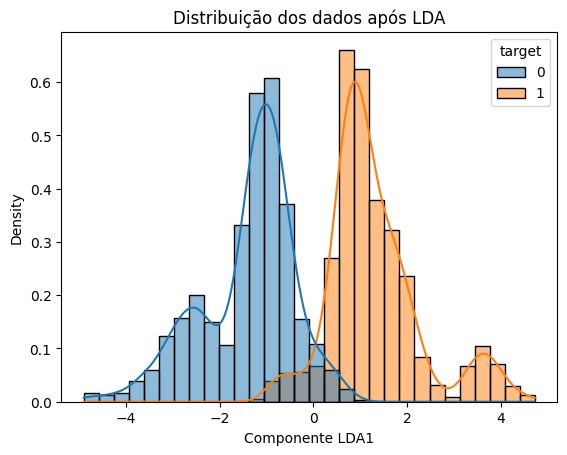

In [35]:
df_treino = pd.read_csv('KRKPA7_treino_numerico.csv')

#Separando features e target
X = df_treino.drop(columns='wtoeg')
y = df_treino['wtoeg']

#LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Para 2 classes, n_components=1
X_lda = lda.fit_transform(X, y)

df_treino = pd.DataFrame(X_lda, columns=['LDA1'])
df_treino['target'] = y.values

# Visualizando o resultado
sns.histplot(data=df_treino, x='LDA1', hue='target', kde=True, stat='density', common_norm=False)
plt.title('Distribui√ß√£o dos dados ap√≥s LDA')
plt.xlabel('Componente LDA1')
plt.show()


In [36]:
df_treino

LDA1  target
0     1.010583       1
1     0.283059       1
2     0.434231       1
3     1.624120       1
4    -2.203500       0
...        ...     ...
2494 -0.677549       0
2495  1.050416       1
2496 -0.274516       1
2497 -3.037145       0
2498 -3.664324       0

[2499 rows x 2 columns]

In [37]:
print(df_treino.max())
print(df_treino.min())

LDA1      4.720669
target    1.000000
dtype: float64
LDA1     -4.894056
target    0.000000
dtype: float64


In [38]:
df_treino.to_csv("KRKPA7_treino_LDA.csv", index=False)

In [39]:
# Extrai os valores da coluna LDA1 como array
valores = df_treino["LDA1"].values

# Calcula a m√©dia
media = sum(valores) / len(valores)

# Calcula o desvio padr√£o
variancia = sum((x - media) ** 2 for x in valores) / (len(valores) - 1)
desvio_padrao = variancia ** 0.5

# Cria um novo DataFrame com LDA1 padronizado e target original
df_treino_normalizado = pd.DataFrame({
    "LDA1": [(x - media) / desvio_padrao for x in valores],
    "target": df_treino["target"].values
})

print(df_treino_normalizado.max())
print(df_treino_normalizado.min())
df_treino_normalizado.to_csv("KRKPA7_treino_LDA_normalizado.csv", index=False)

LDA1      2.822949
target    1.000000
dtype: float64
LDA1     -2.926634
target    0.000000
dtype: float64


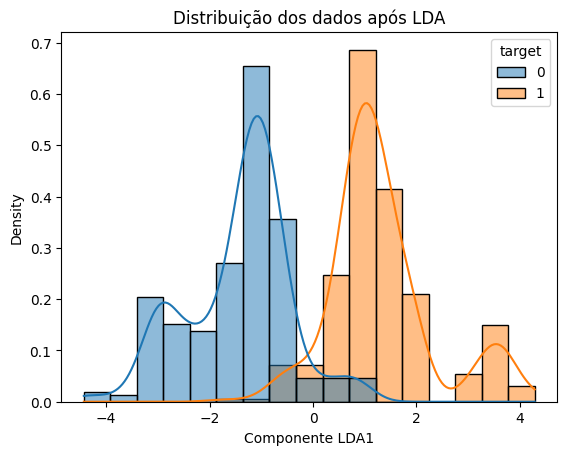

In [40]:
# Separando features e target
X = df_teste.drop(columns='wtoeg')
y = df_teste['wtoeg']

# LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Para 2 classes, n_components=1
X_lda = lda.fit_transform(X, y)

df_teste = pd.DataFrame(X_lda, columns=['LDA1'])
df_teste['target'] = y.values

# Visualizando o resultado
sns.histplot(data=df_teste, x='LDA1', hue='target', kde=True, stat='density', common_norm=False)
plt.title('Distribui√ß√£o dos dados ap√≥s LDA')
plt.xlabel('Componente LDA1')
plt.show()


In [41]:
df_teste

LDA1  target
0    0.800948       1
1    0.621283       1
2    1.531423       1
3    0.433252       1
4    1.462812       1
..        ...     ...
614 -0.015496       1
615  0.727426       1
616  0.747719       1
617  0.498482       1
618  0.436284       1

[619 rows x 2 columns]

In [42]:
df_teste.to_csv("KRKPA7_teste_LDA.csv", index=False)

In [43]:
# Extrai os valores da coluna LDA1 como array
valores = df_teste["LDA1"].values

# Calcula a m√©dia
media = sum(valores) / len(valores)

# Calcula o desvio padr√£o
variancia = sum((x - media) ** 2 for x in valores) / (len(valores) - 1)
desvio_padrao = variancia ** 0.5

# Cria um novo DataFrame com LDA1 padronizado e target original
df_teste_normalizado = pd.DataFrame({
    "LDA1": [(x - media) / desvio_padrao for x in valores],
    "target": df_teste["target"].values
})

print(df_teste_normalizado.max())
print(df_teste_normalizado.min())
df_teste_normalizado.to_csv("KRKPA7_teste_LDA_normalizado.csv", index=False)

LDA1      2.527105
target    1.000000
dtype: float64
LDA1     -2.611959
target    0.000000
dtype: float64


<h2 align="center" style="font-family: 'Times New Roman', Times, serif; font-weight: bold;">
  An√°lise Preditiva
</h2>

In [3]:
df_treino = pd.read_csv('KRKPA7_treino_LDA_normalizado.csv')
df_teste = pd.read_csv('KRKPA7_teste_LDA_normalizado.csv')

<h4>1. Defini√ß√£o da t√©cnica de valida√ß√£o a ser utilizada (cross-validation, hold-out, leave-one-out,
etc):</h4>

<span style='font-size:16px; ;'>R: A t√©cnica de valida√ß√£o a ser utilizada ser√° o leave-one-out devido √† quantidade de amostras dispon√≠veis.</span>

<h4>2. Defini√ß√£o das m√©tricas a serem utilizadas para avaliar os resultados preditivos dos modelos
(acur√°cia, precis√£o, recall, matriz de confus√£o, etc): </h4>

In [4]:
metricas_validacao = {
    'KNN': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acur√°cia': None,
        'Precis√£o': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    },
    '√Årvore de Decis√£o': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acur√°cia': None,
        'Precis√£o': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    },
    'Rede Neural': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acur√°cia': None,
        'Precis√£o': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    }
}


<h4>3. Defini√ß√£o de um algoritmo base (baseline), que ser√° utilizado como base para an√°lise dos
resultados ‚Äì algoritmo classe majorit√°ria: </h4>

In [5]:
  """
    baseline que prediz 1 se LDA1 > 0, sen√£o 0.
    Retorna:
        np.ndarray com os valores previstos (0 ou 1)
    """
def baseline_lda1_predict(X_teste: pd.DataFrame) -> np.ndarray:
  
    return (X_teste["LDA1"] > 0).astype(int).values

In [6]:
X = df_treino[["LDA1"]].values
y = df_treino["target"].values

<h4>4. Cria√ß√£o de modelo preditivo utilizando algoritmo de indu√ß√£o baseado nos vizinhos mais
pr√≥ximos e similaridade de dados (K-NN): </h4>

=== M√©tricas globais (Leave-One-Out + KNN Euclidiano) ===
VP (VP): 1227
FP: 74
VN (VN): 1116
FN: 84

Precis√£o: 0.9431
Recall (Sensibilidade): 0.9359
Especificidade: 0.9378
Acur√°cia: 0.9368
F1-score: 0.9395
TFP (Erro tipo I): 0.0622
TFN (Erro tipo II): 0.0641


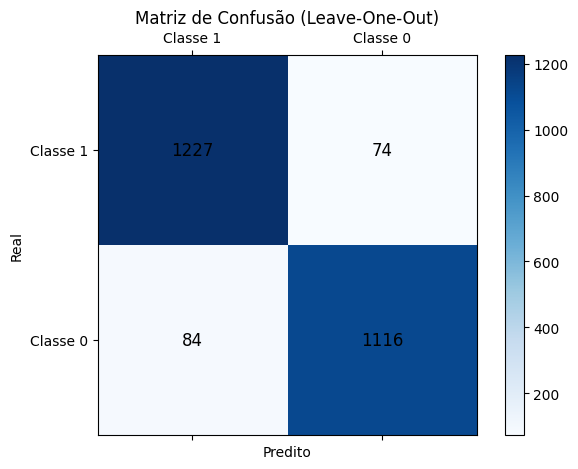

In [7]:
df_treino = pd.read_csv('KRKPA7_treino_LDA_normalizado.csv')
# Separar features e target
X = df_treino[["LDA1"]].values
y = df_treino["target"].values

# Inicializar contadores globais
VP = FP = VN = FN = 0

# Leave-One-Out
for i in range(len(X)):
    # Separar amostra de teste
    X_test = X[i].reshape(1, -1)
    y_test = y[i]
    
    # Criar conjuntos de treino
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)

    # KNN com dist√¢ncia euclidiana
    knn = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)[0]

    # Atualizar contadores
    if y_test == 1 and y_pred == 1:
        VP += 1
    elif y_test == 0 and y_pred == 1:
        FP += 1
    elif y_test == 0 and y_pred == 0:
        VN += 1
    elif y_test == 1 and y_pred == 0:
        FN += 1

# Calcular m√©tricas globais
precision = VP / (VP + FP) if (VP + FP) > 0 else 0
recall = VP / (VP + FN) if (VP + FN) > 0 else 0
specificity = VN / (VN + FP) if (VN + FP) > 0 else 0
accuracy = (VP + VN) / (VP + VN + FP + FN)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
tfp = FP / (FP + VN) if (FP + VN) > 0 else 0
tfn = FN / (FN + VP) if (FN + VP) > 0 else 0

# Exibir resultados
print("=== M√©tricas globais (Leave-One-Out + KNN Euclidiano) ===")
print(f"VP (VP): {VP}")
print(f"FP: {FP}")
print(f"VN (VN): {VN}")
print(f"FN: {FN}")
print()
print(f"Precis√£o: {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"Acur√°cia: {accuracy:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"TFP (Erro tipo I): {tfp:.4f}")
print(f"TFN (Erro tipo II): {tfn:.4f}")

metricas_validacao['KNN']['Acur√°cia'] = accuracy
metricas_validacao['KNN']['Precis√£o'] = precision
metricas_validacao['KNN']['Recall'] = recall
metricas_validacao['KNN']['Especificidade'] = specificity
metricas_validacao['KNN']['F1-score'] = f1_score
metricas_validacao['KNN']['TFP'] = tfp
metricas_validacao['KNN']['TFN'] = tfn
metricas_validacao['KNN']['VP'] = VP
metricas_validacao['KNN']['VN'] = VN
metricas_validacao['KNN']['FP'] = FP
metricas_validacao['KNN']['FN'] = FN

# Matriz de confus√£o
conf_matrix = np.array([[VP, FP],
                        [FN, VN]])

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap="Blues")

for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha='center', va='center', fontsize=12)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Classe 1", "Classe 0"])
ax.set_yticklabels(["Classe 1", "Classe 0"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confus√£o (Leave-One-Out)")
plt.colorbar(cax)
plt.tight_layout()
plt.show()


<h4>5. Cria√ß√£o de modelo preditivo utilizando algoritmo de indu√ß√£o baseado em √°rvores de
decis√£o (decision tree ou √°rvore C4.5):</h4>

=== M√©tricas globais (Leave-One-Out + √Årvore de Decis√£o) ===
VP (VP): 1253
FP: 65
VN (VN): 1125
FN: 58

Precis√£o: 0.9507
Recall (Sensibilidade): 0.9558
Especificidade: 0.9454
Acur√°cia: 0.9508
F1-score: 0.9532
TFP (Erro tipo I): 0.0546
TFN (Erro tipo II): 0.0442


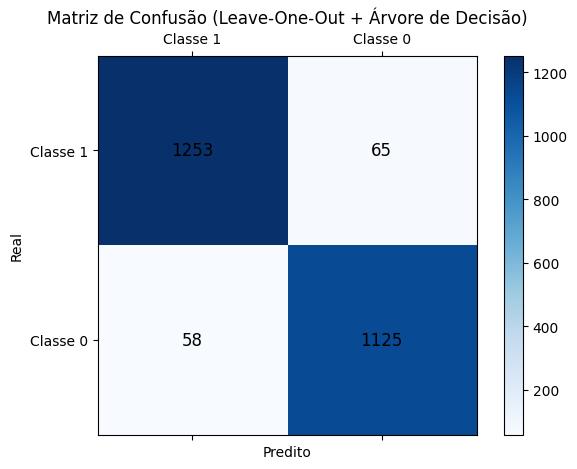

In [8]:
df_treino = pd.read_csv('KRKPA7_treino_LDA_normalizado.csv')
# Separar features e target
X = df_treino[["LDA1"]].values
y = df_treino["target"].values
# Inicializar contadores globais
VP = FP = VN = FN = 0

# Leave-One-Out
for i in range(len(X)):
    # Separar a amostra de teste
    X_test = X[i].reshape(1, -1)
    y_test = y[i]

    # Criar conjuntos de treino
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)

    # √Årvore de decis√£o
    tree =  DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=2,
    random_state=42
)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)[0]

    # Atualizar contadores
    if y_test == 1 and y_pred == 1:
        VP += 1
    elif y_test == 0 and y_pred == 1:
        FP += 1
    elif y_test == 0 and y_pred == 0:
        VN += 1
    elif y_test == 1 and y_pred == 0:
        FN += 1

# Calcular m√©tricas globais
precision = VP / (VP + FP) if (VP + FP) > 0 else 0
recall = VP / (VP + FN) if (VP + FN) > 0 else 0
specificity = VN / (VN + FP) if (VN + FP) > 0 else 0
accuracy = (VP + VN) / (VP + VN + FP + FN)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
tfp = FP / (FP + VN) if (FP + VN) > 0 else 0
tfn = FN / (FN + VP) if (FN + VP) > 0 else 0

metricas_validacao['√Årvore de Decis√£o']['Acur√°cia'] = accuracy
metricas_validacao['√Årvore de Decis√£o']['Precis√£o'] = precision
metricas_validacao['√Årvore de Decis√£o']['Recall'] = recall
metricas_validacao['√Årvore de Decis√£o']['Especificidade'] = specificity
metricas_validacao['√Årvore de Decis√£o']['F1-score'] = f1_score
metricas_validacao['√Årvore de Decis√£o']['TFP'] = tfp
metricas_validacao['√Årvore de Decis√£o']['TFN'] = tfn
metricas_validacao['√Årvore de Decis√£o']['VP'] = VP
metricas_validacao['√Årvore de Decis√£o']['VN'] = VN
metricas_validacao['√Årvore de Decis√£o']['FP'] = FP
metricas_validacao['√Årvore de Decis√£o']['FN'] = FN

# Exibir resultados
print("=== M√©tricas globais (Leave-One-Out + √Årvore de Decis√£o) ===")
print(f"VP (VP): {VP}")
print(f"FP: {FP}")
print(f"VN (VN): {VN}")
print(f"FN: {FN}")
print()
print(f"Precis√£o: {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"Acur√°cia: {accuracy:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"TFP (Erro tipo I): {tfp:.4f}")
print(f"TFN (Erro tipo II): {tfn:.4f}")

# Matriz de confus√£o
conf_matrix = np.array([[VP, FP],
                        [FN, VN]])

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap="Blues")

for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha='center', va='center', fontsize=12)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Classe 1", "Classe 0"])
ax.set_yticklabels(["Classe 1", "Classe 0"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confus√£o (Leave-One-Out + √Årvore de Decis√£o)")
plt.colorbar(cax)
plt.tight_layout()
plt.show()


<h4>6. Cria√ß√£o de modelo preditivo utilizando algoritmo de indu√ß√£o redes neurais artificiais
(MLP): </h4>

=== M√©tricas globais (Leave-One-Out + MLP) ===
VP (VP): 1254
FP: 79
VN (VN): 1111
FN: 57

Precis√£o: 0.9407
Recall (Sensibilidade): 0.9565
Especificidade: 0.9336
Acur√°cia: 0.9456
F1-score: 0.9486
TFP (Erro tipo I): 0.0664
TFN (Erro tipo II): 0.0435


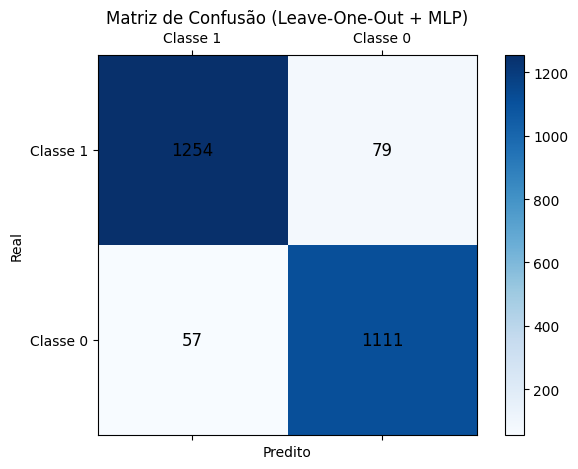

In [9]:
df_treino = pd.read_csv('KRKPA7_treino_LDA_normalizado.csv')
# Separar features e target
X = df_treino[["LDA1"]].values
y = df_treino["target"].values
# Inicializar contadores globais
VP = FP = VN = FN = 0

# Leave-One-Out
for i in range(len(X)):
    X_test = X[i].reshape(1, -1)
    y_test = y[i]

    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)

    # MLP com camada oculta de 5 neur√¥nios
    mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=0, early_stopping=True)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)[0]

    # Atualizar contadores
    if y_test == 1 and y_pred == 1:
        VP += 1
    elif y_test == 0 and y_pred == 1:
        FP += 1
    elif y_test == 0 and y_pred == 0:
        VN += 1
    elif y_test == 1 and y_pred == 0:
        FN += 1

# Calcular m√©tricas globais
precision = VP / (VP + FP) if (VP + FP) > 0 else 0
recall = VP / (VP + FN) if (VP + FN) > 0 else 0
specificity = VN / (VN + FP) if (VN + FP) > 0 else 0
accuracy = (VP + VN) / (VP + VN + FP + FN)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
tfp = FP / (FP + VN) if (FP + VN) > 0 else 0
tfn = FN / (FN + VP) if (FN + VP) > 0 else 0

metricas_validacao['Rede Neural']['Acur√°cia'] = accuracy
metricas_validacao['Rede Neural']['Precis√£o'] = precision
metricas_validacao['Rede Neural']['Recall'] = recall
metricas_validacao['Rede Neural']['Especificidade'] = specificity
metricas_validacao['Rede Neural']['F1-score'] = f1_score
metricas_validacao['Rede Neural']['TFP'] = tfp
metricas_validacao['Rede Neural']['TFN'] = tfn
metricas_validacao['Rede Neural']['VP'] = VP
metricas_validacao['Rede Neural']['VN'] = VN
metricas_validacao['Rede Neural']['FP'] = FP
metricas_validacao['Rede Neural']['FN'] = FN

# Exibir resultados
print("=== M√©tricas globais (Leave-One-Out + MLP) ===")
print(f"VP (VP): {VP}")
print(f"FP: {FP}")
print(f"VN (VN): {VN}")
print(f"FN: {FN}")
print()
print(f"Precis√£o: {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"Acur√°cia: {accuracy:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"TFP (Erro tipo I): {tfp:.4f}")
print(f"TFN (Erro tipo II): {tfn:.4f}")

# Matriz de confus√£o
conf_matrix = np.array([[VP, FP],
                        [FN, VN]])

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap="Blues")

for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha='center', va='center', fontsize=12)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Classe 1", "Classe 0"])
ax.set_yticklabels(["Classe 1", "Classe 0"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confus√£o (Leave-One-Out + MLP)")
plt.colorbar(cax)
plt.tight_layout()
plt.show()


<h4>7. An√°lise dos resultados do algoritmo baseline: </h4>

In [15]:
X_teste = df_teste[["LDA1"]]
y_real = df_teste["target"].values
y_pred = baseline_lda1_predict(X_teste)
df_resultados_baseline = pd.DataFrame()
df_resultados_baseline = pd.DataFrame({
    "Baseline": y_pred,
    "Real": y_real
})

In [16]:
df_resultados_baseline

Baseline  Real
0           1     1
1           1     1
2           1     1
3           1     1
4           0     1
..        ...   ...
612         1     1
613         1     1
614         0     1
615         1     1
616         1     1

[617 rows x 2 columns]

In [17]:
def contar_confusao(preds, reais):
    vp = ((preds == 1) & (reais == 1)).sum()
    vn = ((preds == 0) & (reais == 0)).sum()
    fp = ((preds == 1) & (reais == 0)).sum()
    fn = ((preds == 0) & (reais == 1)).sum()
    return vp, fp, vn, fn

# Calcular os valores para cada modelo
vp_baseline, fp_baseline, vn_baseline, fn_baseline = contar_confusao(df_resultados_baseline["Baseline"], df_resultados_baseline["Real"])

# Calcular m√©tricas globais
precision_baseline = vp_baseline / (vp_baseline + fp_baseline) if (vp_baseline + fp_baseline) > 0 else 0
recall_baseline = vp_baseline / (vp_baseline + fn_baseline) if (vp_baseline + fn_baseline) > 0 else 0
specificity_baseline = vn_baseline / (vn_baseline + fp_baseline) if (vn_baseline + fp_baseline) > 0 else 0
accuracy_baseline = (vp_baseline + vn_baseline) / (vp_baseline + vn_baseline + fp_baseline + fn_baseline)
f1_score_baseline = 2 * (precision_baseline * recall_baseline) / (precision_baseline + recall_baseline) if (precision_baseline + recall_baseline) > 0 else 0
tfp_baseline = fp_baseline / (fp_baseline + vn_baseline) if (fp_baseline + vn_baseline) > 0 else 0
tfn_baseline = fn_baseline / (fn_baseline + vp_baseline) if (fn_baseline + vp_baseline) > 0 else 0

metricas_teste_baseline = {
    'Baseline': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acur√°cia': None,
        'Precis√£o': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    }
}

metricas_teste_baseline['Baseline']['Acur√°cia'] = accuracy_baseline
metricas_teste_baseline['Baseline']['Precis√£o'] = precision_baseline
metricas_teste_baseline['Baseline']['Recall'] = recall_baseline
metricas_teste_baseline['Baseline']['Especificidade'] = specificity_baseline
metricas_teste_baseline['Baseline']['F1-score'] = f1_score_baseline
metricas_teste_baseline['Baseline']['TFP'] = tfp_baseline
metricas_teste_baseline['Baseline']['TFN'] = tfn_baseline
metricas_teste_baseline['Baseline']['VP'] = vp_baseline
metricas_teste_baseline['Baseline']['VN'] = vn_baseline
metricas_teste_baseline['Baseline']['FP'] = fp_baseline
metricas_teste_baseline['Baseline']['FN'] = fn_baseline
df_metricas_teste_baseline = pd.DataFrame.from_dict(metricas_teste_baseline, orient='index')

In [18]:
df_metricas_teste_baseline

VP  FP   VN  FN  Acur√°cia  Precis√£o    Recall  Especificidade  \
Baseline  288  15  295  19  0.944895  0.950495  0.938111        0.951613   

               TFP       TFN  F1-score  
Baseline  0.048387  0.061889  0.944262

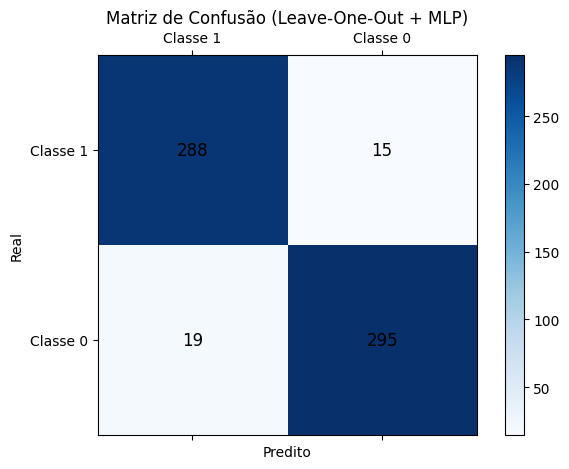

In [19]:
# Matriz de confus√£o
conf_matrix = np.array([[metricas_teste_baseline['Baseline']['VP'], metricas_teste_baseline['Baseline']['FP']],
                        [metricas_teste_baseline['Baseline']['FN'], metricas_teste_baseline['Baseline']['VN']]])

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap="Blues")

for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha='center', va='center', fontsize=12)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Classe 1", "Classe 0"])
ax.set_yticklabels(["Classe 1", "Classe 0"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confus√£o (Leave-One-Out + MLP)")
plt.colorbar(cax)
plt.tight_layout()
plt.show()

<h4>8. An√°lise dos resultados dos tr√™s algoritmos de aprendizado de m√°quina supracitados: </h4>

In [20]:
metricas_validacao

{'KNN': {'VP': 1227,
  'FP': 74,
  'VN': 1116,
  'FN': 84,
  'Acur√°cia': 0.9368252698920432,
  'Precis√£o': 0.9431206764027671,
  'Recall': 0.9359267734553776,
  'Especificidade': 0.9378151260504202,
  'TFP': 0.06218487394957983,
  'TFN': 0.06407322654462243,
  'F1-score': 0.9395099540581929},
 '√Årvore de Decis√£o': {'VP': 1253,
  'FP': 65,
  'VN': 1125,
  'FN': 58,
  'Acur√°cia': 0.9508196721311475,
  'Precis√£o': 0.9506828528072838,
  'Recall': 0.9557589626239512,
  'Especificidade': 0.9453781512605042,
  'TFP': 0.0546218487394958,
  'TFN': 0.04424103737604882,
  'F1-score': 0.9532141498668696},
 'Rede Neural': {'VP': 1254,
  'FP': 79,
  'VN': 1111,
  'FN': 57,
  'Acur√°cia': 0.9456217512994802,
  'Precis√£o': 0.940735183795949,
  'Recall': 0.9565217391304348,
  'Especificidade': 0.9336134453781513,
  'TFP': 0.06638655462184874,
  'TFN': 0.043478260869565216,
  'F1-score': 0.9485627836611196}}

In [21]:
df_metricas_validacao = pd.DataFrame.from_dict(metricas_validacao, orient='index')

In [22]:
df_metricas_validacao

VP  FP    VN  FN  Acur√°cia  Precis√£o    Recall  \
KNN                1227  74  1116  84  0.936825  0.943121  0.935927   
√Årvore de Decis√£o  1253  65  1125  58  0.950820  0.950683  0.955759   
Rede Neural        1254  79  1111  57  0.945622  0.940735  0.956522   

                   Especificidade       TFP       TFN  F1-score  
KNN                      0.937815  0.062185  0.064073  0.939510  
√Årvore de Decis√£o        0.945378  0.054622  0.044241  0.953214  
Rede Neural              0.933613  0.066387  0.043478  0.948563

In [23]:
# Calcular a m√©dia das m√©tricas principais para cada modelo
metricas_principais = ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-score']
df_metricas_validacao['M√©dia'] = df_metricas_validacao[metricas_principais].mean(axis=1)

# Ordenar os modelos pela m√©dia das m√©tricas principais
df_metricas_validacao = df_metricas_validacao.sort_values(by='M√©dia')

In [24]:
df_metricas_validacao

VP  FP    VN  FN  Acur√°cia  Precis√£o    Recall  \
KNN                1227  74  1116  84  0.936825  0.943121  0.935927   
Rede Neural        1254  79  1111  57  0.945622  0.940735  0.956522   
√Årvore de Decis√£o  1253  65  1125  58  0.950820  0.950683  0.955759   

                   Especificidade       TFP       TFN  F1-score     M√©dia  
KNN                      0.937815  0.062185  0.064073  0.939510  0.938846  
Rede Neural              0.933613  0.066387  0.043478  0.948563  0.947860  
√Årvore de Decis√£o        0.945378  0.054622  0.044241  0.953214  0.952619

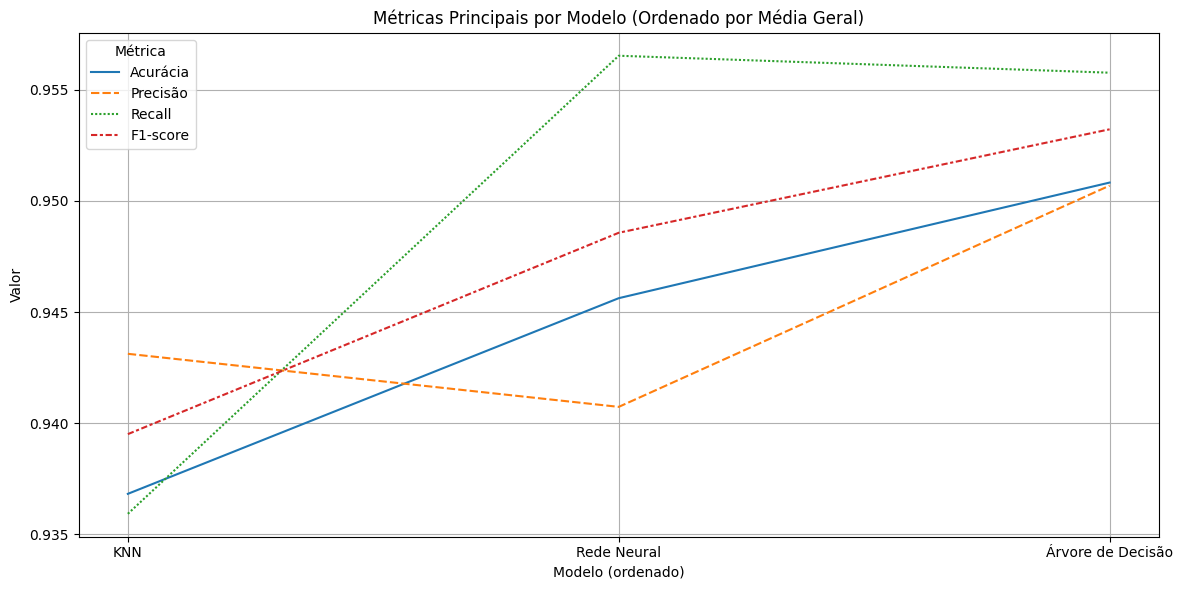

In [25]:

# Plotar gr√°fico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_metricas_validacao[metricas_principais])
plt.title('M√©tricas Principais por Modelo (Ordenado por M√©dia Geral)')
plt.ylabel('Valor')
plt.xlabel('Modelo (ordenado)')
plt.xticks(ticks=range(len(df_metricas_validacao.index)), labels=df_metricas_validacao.index, rotation=0)
plt.legend(title='M√©trica')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')
knn.fit(X, y)
tree = DecisionTreeClassifier(criterion='entropy',
    max_depth=3,
    min_samples_split=2,
    random_state=42)
tree.fit(X, y)
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=0)
mlp.fit(X, y)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=0)

In [27]:
df_teste = pd.read_csv('KRKPA7_teste_LDA_normalizado.csv')
X_teste = df_teste[["LDA1"]].values
y_real = df_teste["target"].values

# Previs√µes dos modelos
y_pred_knn = knn.predict(X_teste)
y_pred_tree = tree.predict(X_teste)
y_pred_mlp = mlp.predict(X_teste)

# Criar um novo DataFrame com os resultados
df_resultados = pd.DataFrame({
    "Real": y_real,
    "KNN": y_pred_knn,
    "√Årvore": y_pred_tree,
    "MLP": y_pred_mlp
})


In [28]:
df_resultados

Real  KNN  √Årvore  MLP
0       1    1       1    1
1       1    1       1    1
2       1    1       1    1
3       1    1       1    1
4       1    0       0    0
..    ...  ...     ...  ...
612     1    1       1    1
613     1    1       1    1
614     1    0       0    0
615     1    1       1    1
616     1    1       1    1

[617 rows x 4 columns]

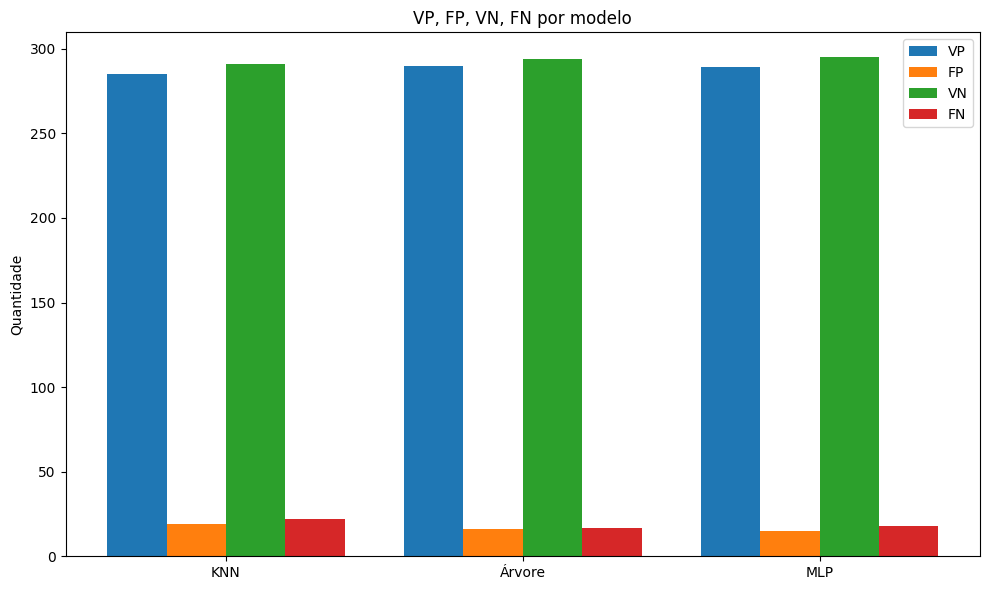

In [41]:
metricas_teste = {
    'KNN': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acur√°cia': None,
        'Precis√£o': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    },
    '√Årvore de Decis√£o': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acur√°cia': None,
        'Precis√£o': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    },
    'Rede Neural': {
        'VP': None,
        'FP': None,
        'VN': None,
        'FN': None,
        'Acur√°cia': None,
        'Precis√£o': None,
        'Recall': None,
        'Especificidade': None,
        'TFP': None,
        'TFN': None,
        'F1-score': None
    }
}

# Calcular os valores para cada modelo
vp_knn, fp_knn, vn_knn, fn_knn = contar_confusao(df_resultados["KNN"], df_resultados["Real"])
vp_tree, fp_tree, vn_tree, fn_tree = contar_confusao(df_resultados["√Årvore"], df_resultados["Real"])
vp_mlp, fp_mlp, vn_mlp, fn_mlp = contar_confusao(df_resultados["MLP"], df_resultados["Real"])

# Calcular m√©tricas globais
precision_knn = vp_knn / (vp_knn + fp_knn) if (vp_knn + fp_knn) > 0 else 0
recall_knn = vp_knn / (vp_knn + fn_knn) if (vp_knn + fn_knn) > 0 else 0
specificity_knn = vn_knn / (vn_knn + fp_knn) if (vn_knn + fp_knn) > 0 else 0
accuracy_knn = (vp_knn + vn_knn) / (vp_knn + vn_knn + fp_knn + fn_knn)
f1_score_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn) if (precision_knn + recall_knn) > 0 else 0
tfp_knn = fp_knn / (fp_knn + vn_knn) if (fp_knn + vn_knn) > 0 else 0
tfn_knn = fn_knn / (fn_knn + vp_knn) if (fn_knn + vp_knn) > 0 else 0

metricas_teste['KNN']['Acur√°cia'] = accuracy_knn
metricas_teste['KNN']['Precis√£o'] = precision_knn
metricas_teste['KNN']['Recall'] = recall_knn
metricas_teste['KNN']['Especificidade'] = specificity_knn
metricas_teste['KNN']['F1-score'] = f1_score_knn
metricas_teste['KNN']['TFP'] = tfp_knn
metricas_teste['KNN']['TFN'] = tfn_knn
metricas_teste['KNN']['VP'] = vp_knn
metricas_teste['KNN']['VN'] = vn_knn
metricas_teste['KNN']['FP'] = fp_knn
metricas_teste['KNN']['FN'] = fn_knn

# Calcular m√©tricas globais
precision_tree = vp_tree / (vp_tree + fp_tree) if (vp_tree + fp_tree) > 0 else 0
recall_tree = vp_tree / (vp_tree + fn_tree) if (vp_tree + fn_tree) > 0 else 0
specificity_tree = vn_tree / (vn_tree + fp_tree) if (vn_tree + fp_tree) > 0 else 0
accuracy_tree = (vp_tree + vn_tree) / (vp_tree + vn_tree + fp_tree + fn_tree)
f1_score_tree = 2 * (precision_tree * recall_tree) / (precision_tree + recall_tree) if (precision_tree + recall_tree) > 0 else 0
tfp_tree = fp_tree / (fp_tree + vn_tree) if (fp_tree + vn_tree) > 0 else 0
tfn_tree = fn_tree / (fn_tree + vp_tree) if (fn_tree + vp_tree) > 0 else 0

metricas_teste['√Årvore de Decis√£o']['Acur√°cia'] = accuracy_tree
metricas_teste['√Årvore de Decis√£o']['Precis√£o'] = precision_tree
metricas_teste['√Årvore de Decis√£o']['Recall'] = recall_tree
metricas_teste['√Årvore de Decis√£o']['Especificidade'] = specificity_tree
metricas_teste['√Årvore de Decis√£o']['F1-score'] = f1_score_tree
metricas_teste['√Årvore de Decis√£o']['TFP'] = tfp_tree
metricas_teste['√Årvore de Decis√£o']['TFN'] = tfn_tree
metricas_teste['√Årvore de Decis√£o']['VP'] = vp_tree
metricas_teste['√Årvore de Decis√£o']['VN'] = vn_tree
metricas_teste['√Årvore de Decis√£o']['FP'] = fp_tree
metricas_teste['√Årvore de Decis√£o']['FN'] = fn_tree

# Calcular m√©tricas globais
precision_mlp = vp_mlp / (vp_mlp + fp_mlp) if (vp_mlp + fp_mlp) > 0 else 0
recall_mlp = vp_mlp / (vp_mlp + fn_mlp) if (vp_mlp + fn_mlp) > 0 else 0
specificity_mlp = vn_mlp / (vn_mlp + fp_mlp) if (vn_mlp + fp_mlp) > 0 else 0
accuracy_mlp = (vp_mlp + vn_mlp) / (vp_mlp + vn_mlp + fp_mlp + fn_mlp)
f1_score_mlp = 2 * (precision_mlp * recall_mlp) / (precision_mlp + recall_mlp) if (precision_mlp + recall_mlp) > 0 else 0
tfp_mlp = fp_mlp / (fp_mlp + vn_mlp) if (fp_mlp + vn_mlp) > 0 else 0
tfn_mlp = fn_mlp / (fn_mlp + vp_mlp) if (fn_mlp + vp_mlp) > 0 else 0

metricas_teste['Rede Neural']['Acur√°cia'] = accuracy_mlp
metricas_teste['Rede Neural']['Precis√£o'] = precision_mlp
metricas_teste['Rede Neural']['Recall'] = recall_mlp
metricas_teste['Rede Neural']['Especificidade'] = specificity_mlp
metricas_teste['Rede Neural']['F1-score'] = f1_score_mlp
metricas_teste['Rede Neural']['TFP'] = tfp_mlp
metricas_teste['Rede Neural']['TFN'] = tfn_mlp
metricas_teste['Rede Neural']['VP'] = vp_mlp
metricas_teste['Rede Neural']['VN'] = vn_mlp
metricas_teste['Rede Neural']['FP'] = fp_mlp
metricas_teste['Rede Neural']['FN'] = fn_mlp

df_metricas_teste= pd.DataFrame.from_dict(metricas_teste, orient='index')

# Preparar dados para o gr√°fico
modelos = ['KNN', '√Årvore', 'MLP']
valores = {
    'VP': [vp_knn, vp_tree, vp_mlp],
    'FP': [fp_knn, fp_tree, fp_mlp],
    'VN': [vn_knn, vn_tree, vn_mlp],
    'FN': [fn_knn, fn_tree, fn_mlp]
}

# Criar gr√°fico de colunas agrupadas
x = range(len(modelos))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([p - 1.5*width for p in x], valores['VP'], width, label='VP')
ax.bar([p - 0.5*width for p in x], valores['FP'], width, label='FP')
ax.bar([p + 0.5*width for p in x], valores['VN'], width, label='VN')
ax.bar([p + 1.5*width for p in x], valores['FN'], width, label='FN')

ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.set_ylabel("Quantidade")
ax.set_title("VP, FP, VN, FN por modelo")
ax.legend()
plt.tight_layout()
plt.show()

In [42]:
df_metricas_teste


VP  FP   VN  FN  Acur√°cia  Precis√£o    Recall  \
KNN                285  19  291  22  0.933549  0.937500  0.928339   
√Årvore de Decis√£o  290  16  294  17  0.946515  0.947712  0.944625   
Rede Neural        289  15  295  18  0.946515  0.950658  0.941368   

                   Especificidade       TFP       TFN  F1-score  
KNN                      0.938710  0.061290  0.071661  0.932897  
√Årvore de Decis√£o        0.948387  0.051613  0.055375  0.946166  
Rede Neural              0.951613  0.048387  0.058632  0.945990

In [43]:
# Calcular a m√©dia das m√©tricas principais para cada modelo
metricas_principais = ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-score']
df_metricas_teste['M√©dia'] = df_metricas_teste[metricas_principais].mean(axis=1)

# Ordenar os modelos pela m√©dia das m√©tricas principais
df_metricas_teste = df_metricas_teste.sort_values(by='M√©dia')

In [44]:
df_metricas_teste

VP  FP   VN  FN  Acur√°cia  Precis√£o    Recall  \
KNN                285  19  291  22  0.933549  0.937500  0.928339   
Rede Neural        289  15  295  18  0.946515  0.950658  0.941368   
√Årvore de Decis√£o  290  16  294  17  0.946515  0.947712  0.944625   

                   Especificidade       TFP       TFN  F1-score     M√©dia  
KNN                      0.938710  0.061290  0.071661  0.932897  0.933071  
Rede Neural              0.951613  0.048387  0.058632  0.945990  0.946133  
√Årvore de Decis√£o        0.948387  0.051613  0.055375  0.946166  0.946255

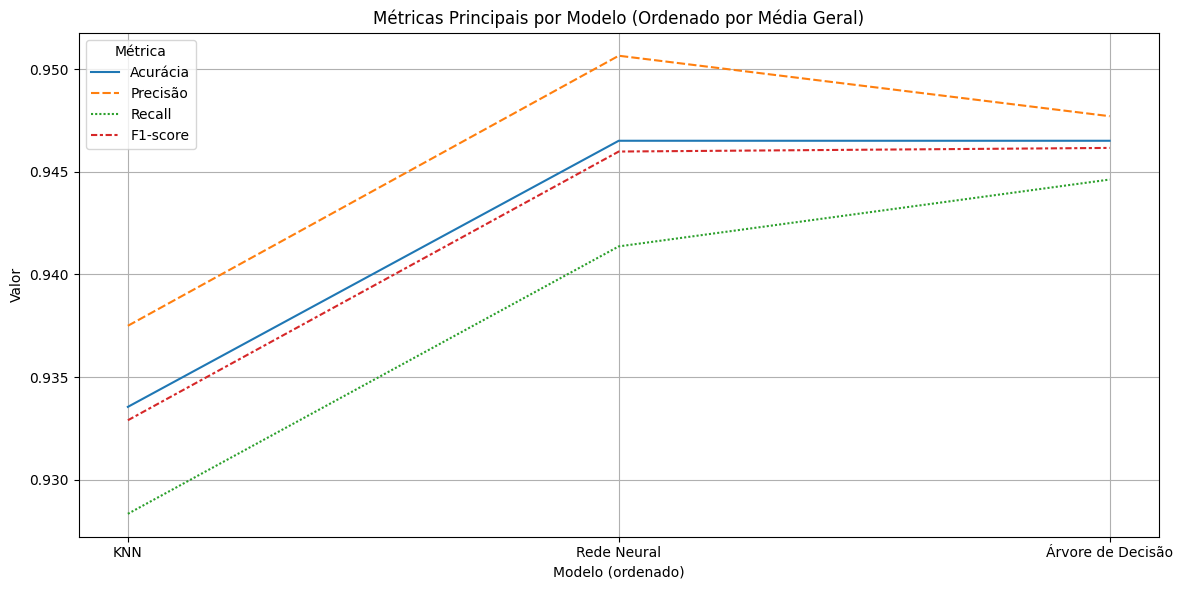

In [45]:
# Plotar gr√°fico de linhas com os modelos ordenados
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_metricas_teste[metricas_principais])
plt.title('M√©tricas Principais por Modelo (Ordenado por M√©dia Geral)')
plt.ylabel('Valor')
plt.xlabel('Modelo (ordenado)')
plt.xticks(ticks=range(len(df_metricas_teste.index)), labels=df_metricas_teste.index, rotation=0)
plt.legend(title='M√©trica')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
df_metricas_teste = pd.concat([df_metricas_teste, df_metricas_teste_baseline])
# Calcular a m√©dia das m√©tricas principais para cada modelo
metricas_principais = ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-score']
df_metricas_teste['M√©dia'] = df_metricas_teste[metricas_principais].mean(axis=1)

# Ordenar os modelos pela m√©dia das m√©tricas principais
df_metricas_teste = df_metricas_teste.sort_values(by='M√©dia')

In [47]:
df_metricas_teste

VP  FP   VN  FN  Acur√°cia  Precis√£o    Recall  \
KNN                285  19  291  22  0.933549  0.937500  0.928339   
Baseline           288  15  295  19  0.944895  0.950495  0.938111   
Rede Neural        289  15  295  18  0.946515  0.950658  0.941368   
√Årvore de Decis√£o  290  16  294  17  0.946515  0.947712  0.944625   

                   Especificidade       TFP       TFN  F1-score     M√©dia  
KNN                      0.938710  0.061290  0.071661  0.932897  0.933071  
Baseline                 0.951613  0.048387  0.061889  0.944262  0.944441  
Rede Neural              0.951613  0.048387  0.058632  0.945990  0.946133  
√Årvore de Decis√£o        0.948387  0.051613  0.055375  0.946166  0.946255

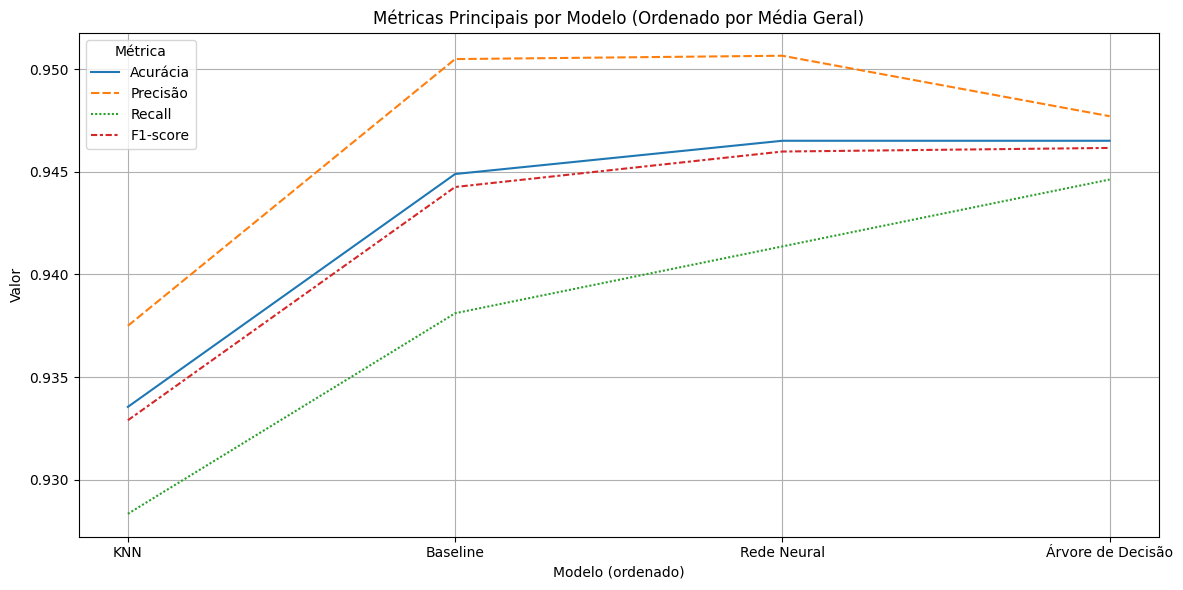

In [48]:
# Plotar gr√°fico de linhas com os modelos ordenados
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_metricas_teste[metricas_principais])
plt.title('M√©tricas Principais por Modelo (Ordenado por M√©dia Geral)')
plt.ylabel('Valor')
plt.xlabel('Modelo (ordenado)')
plt.xticks(ticks=range(len(df_metricas_teste.index)), labels=df_metricas_teste.index, rotation=0)
plt.legend(title='M√©trica')
plt.grid(True)
plt.tight_layout()
plt.show()